In [40]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os
import IBEX_Module.IBEX_Analysis as ibex
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
importlib.reload(ibex)

<module 'IBEX_Module.IBEX_Analysis' from 'D:\\Moje dane\\Programy Python\\IBEX_Framework\\IBEX_Module\\IBEX_Analysis.py'>

# EDA
## Eksploracyjna analiza danych przeprowadzona niezależnie dla zbiorów danych BeforePerigeeChange i AfterPerigeeChange
### Opis procesu
- Wyznaczenie rozkładów częstości zliczeń cząstek ENA dla każdego z kanałów energetycznych
- Transformacja rozkładów częstości zliczeń cząstek ENA do skali log10
- Wyznaczenie współczynników korelacji Pearsona dla sum zliczeń cząstek ENA dla każdego kanału
- Wyznaczenie współczynników korelacji Pearsona dla częstości zliczeń cząstek ENA dla każdego kanału
- Transformacja macierzy współczynników korelacji Pearsona dla częstości zliczeń cząstek ENA do skali log10
### Wizualizacja
- Histogramy rozkładów częstości zliczeń względem ilości zliczeń cząstek ENA przez każdy kanał energetyczny
- Histogramy rozkładów częstości zliczeń względem ilości zliczeń cząstek ENA przez każdy kanał energetyczny (w skali log10)
- Mapy cieplne współczynników korelacji Pearsona dla sum zliczeń cząstek ENA dla każdego kanału energetycznego
- Mapy cieplne współczynników korelacji Pearsona dla częstości zliczeń cząstek ENA dla każdego kanału energetycznego (w skali log10)

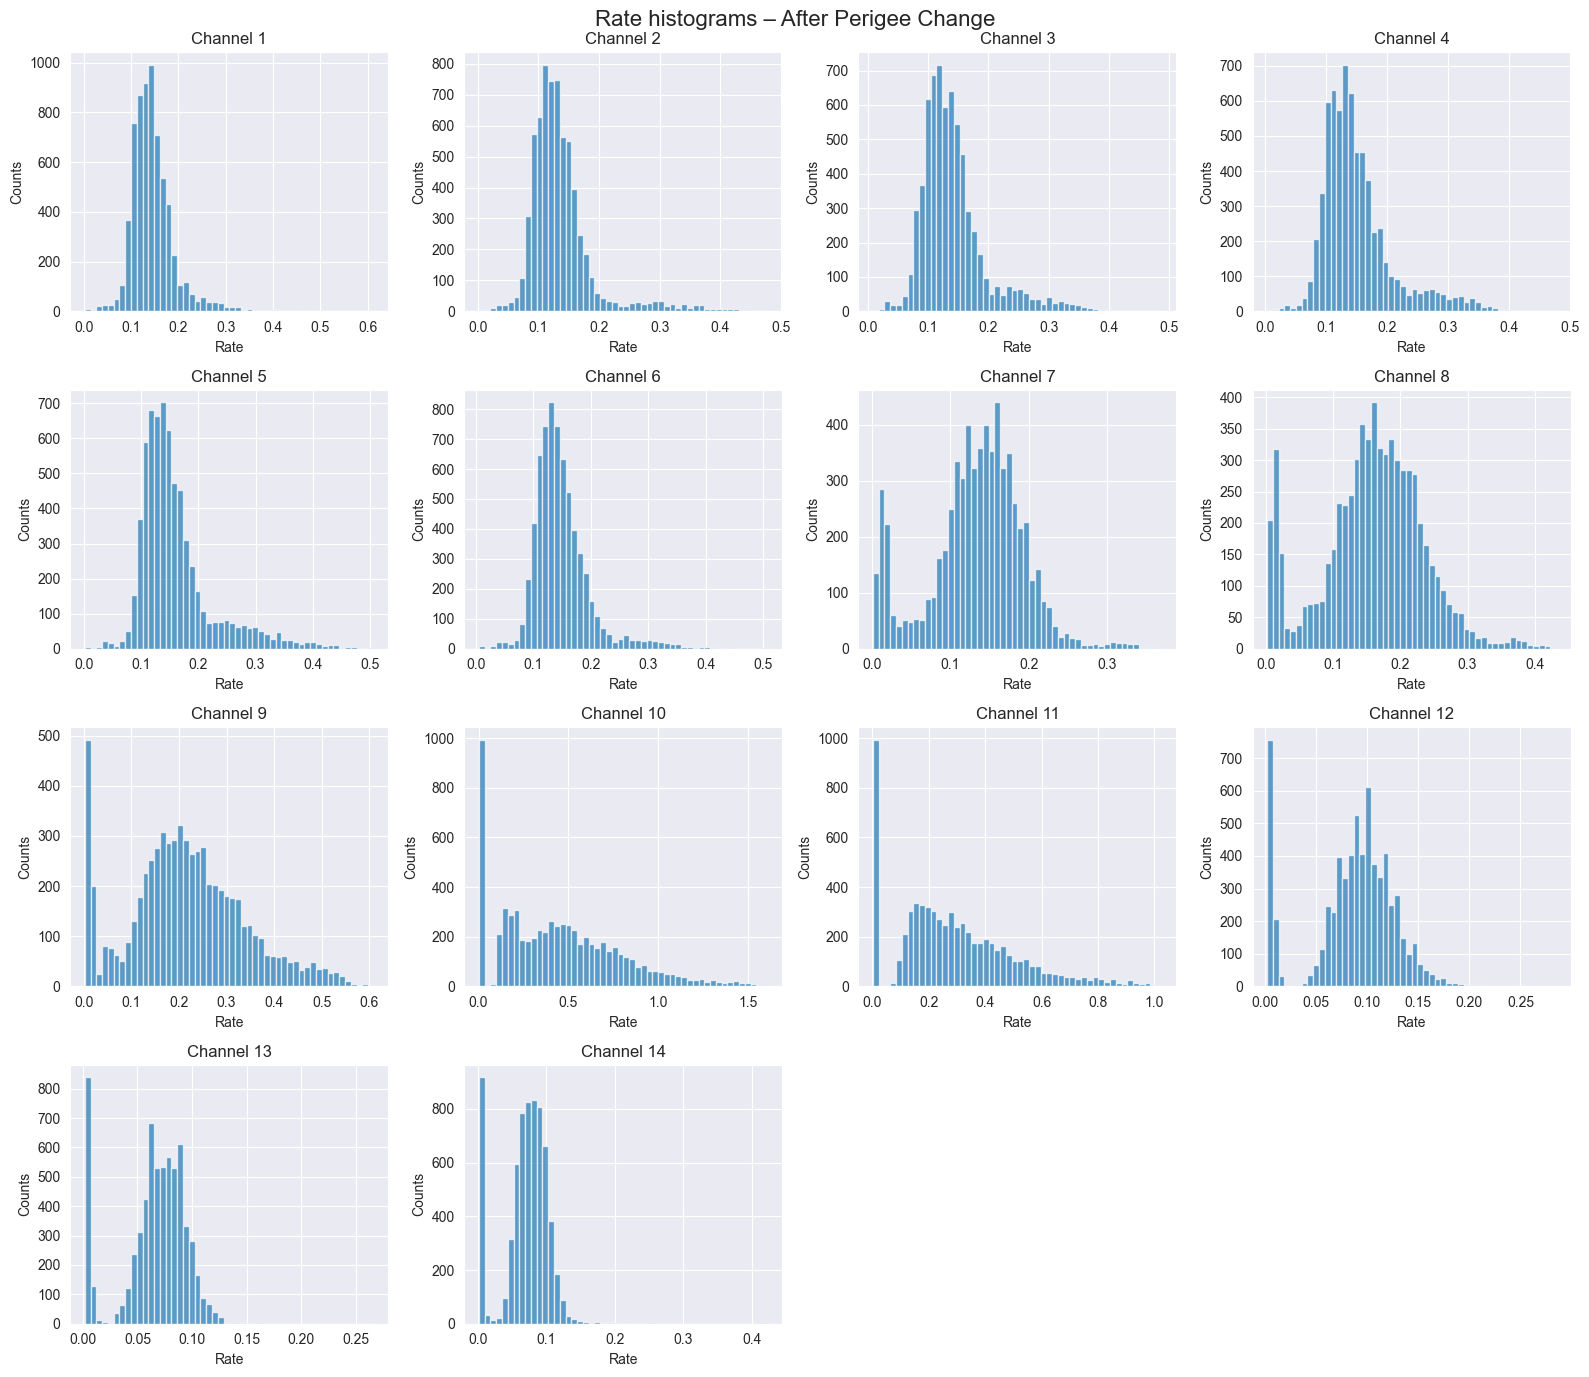

In [6]:
rates_before, conds_before = ibex.load_dataset(
    "aggregated_data_for_autoencoder/BeforePerigeeChange"
)
rates_after, conds_after = ibex.load_dataset(
    "aggregated_data_for_autoencoder/AfterPerigeeChange"
)
ibex.plot_rate_histograms(rates_before, "Rate histograms – Before Perigee Change")
ibex.plot_rate_histograms(rates_after,  "Rate histograms – After Perigee Change")

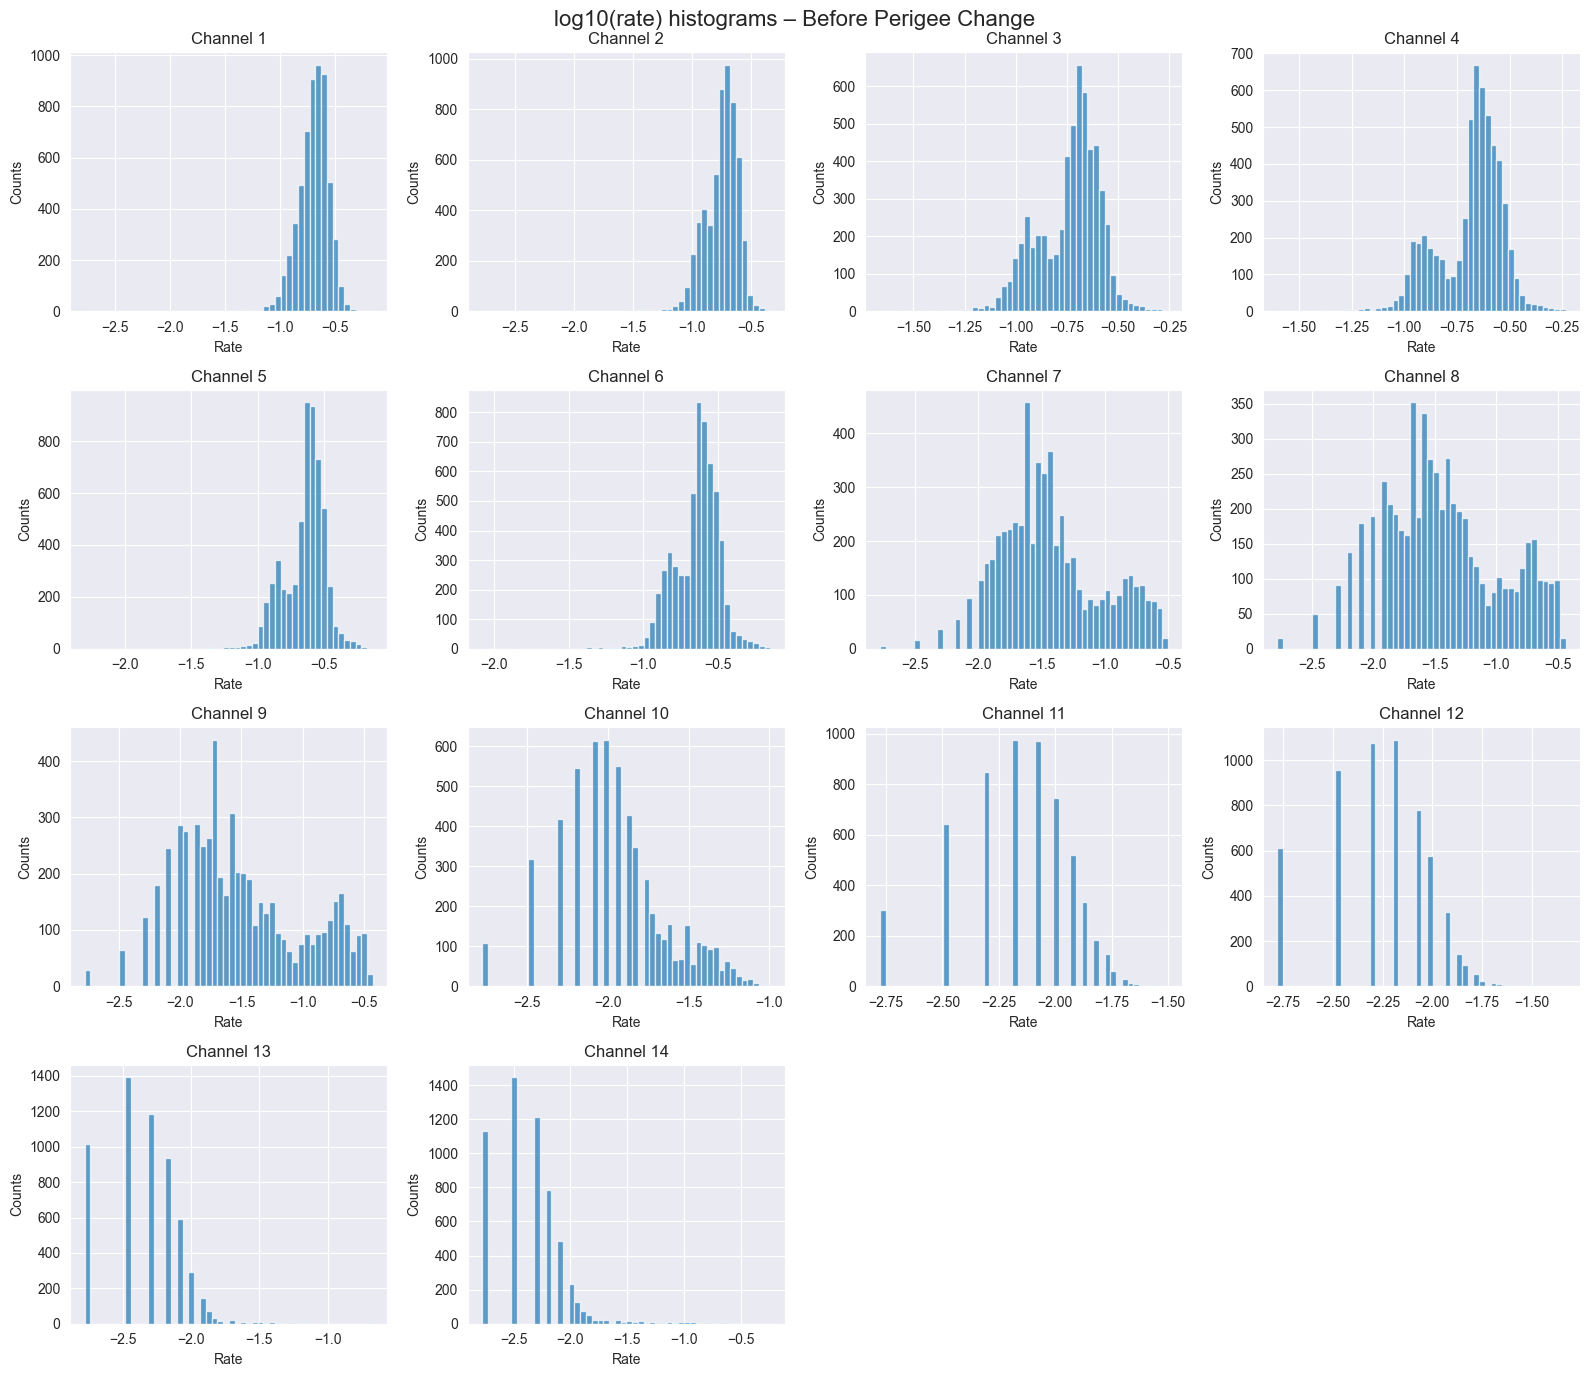

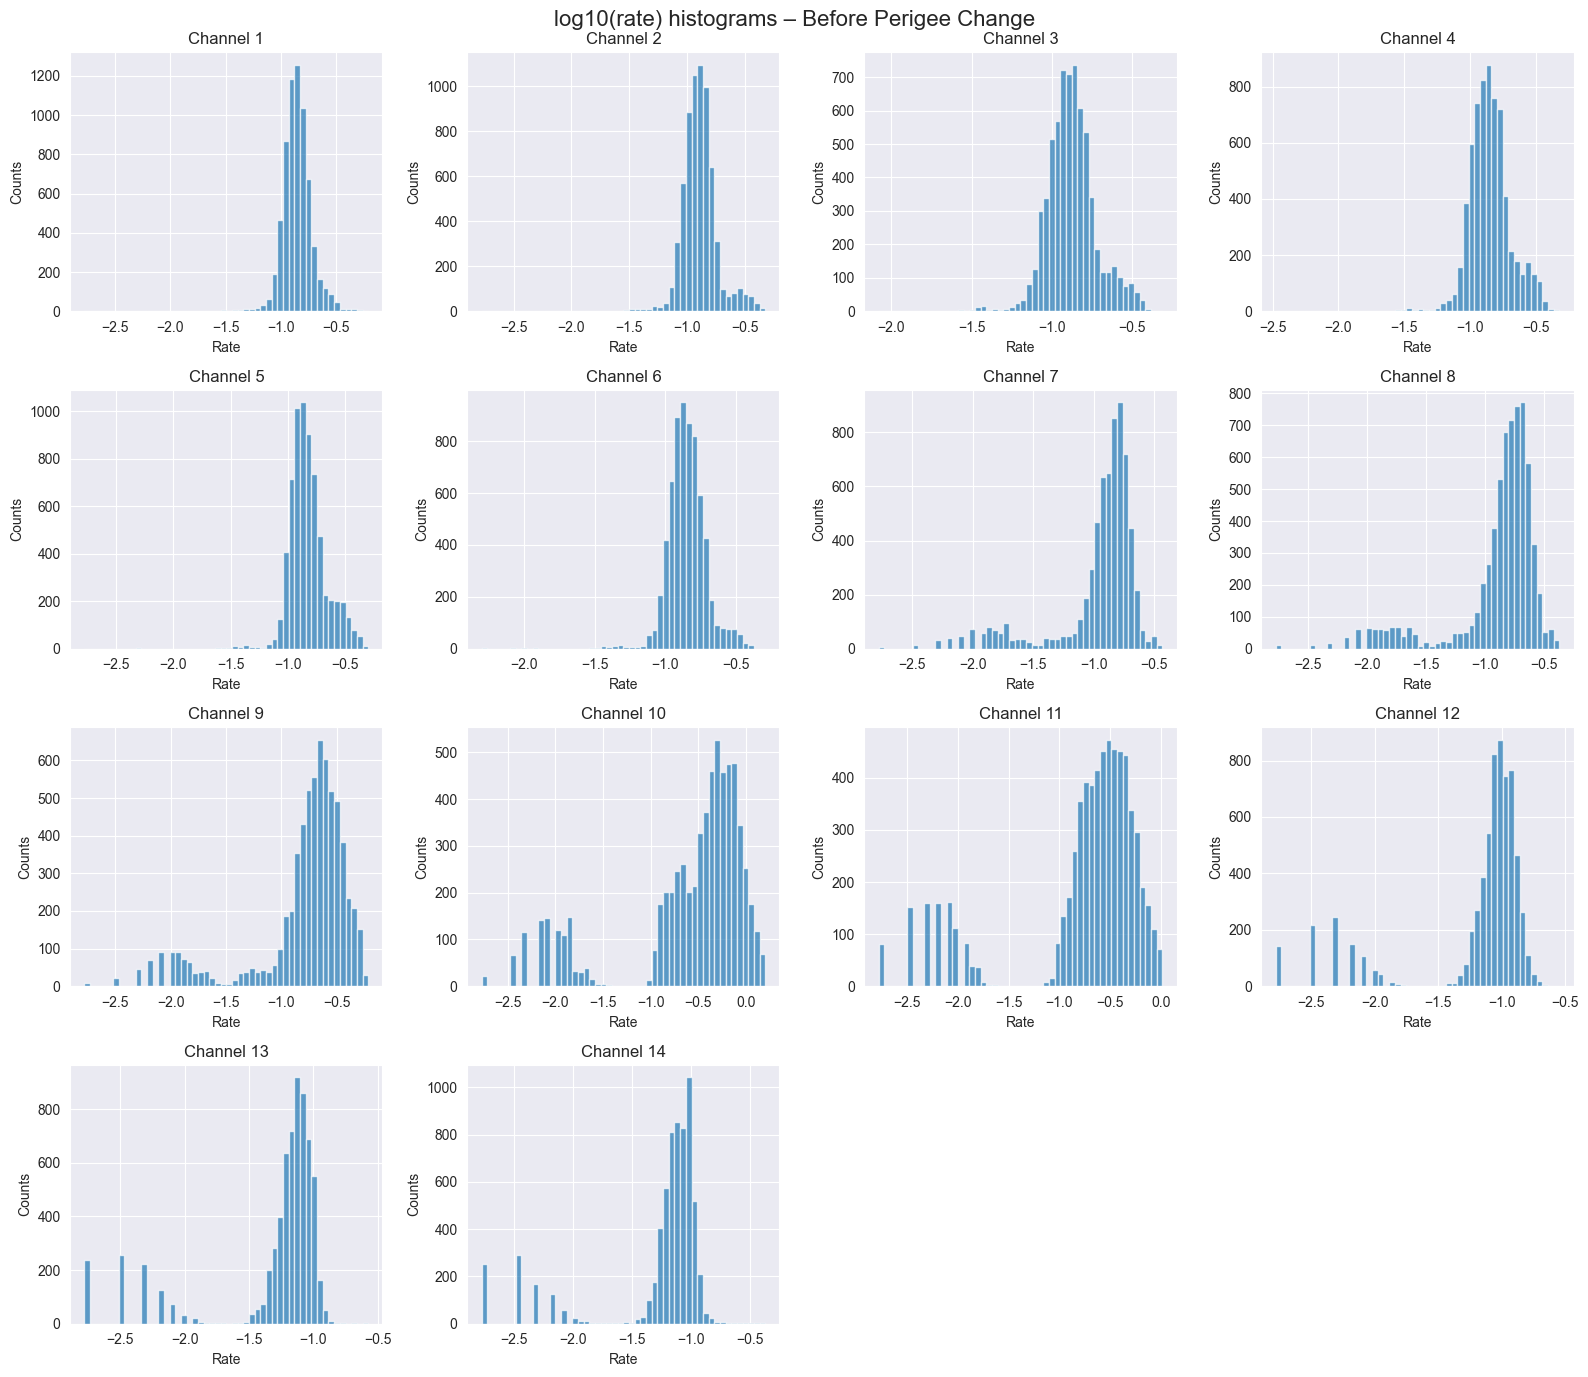

In [7]:
rates_before, conds_before = ibex.load_dataset(
    "aggregated_data_for_autoencoder/BeforePerigeeChange"
)
rates_after, conds_after = ibex.load_dataset(
    "aggregated_data_for_autoencoder/AfterPerigeeChange"
)
ibex.plot_rate_histograms(
    np.log10(rates_before + 1e-6),
    "log10(rate) histograms – Before Perigee Change"
)

ibex.plot_rate_histograms(
    np.log10(rates_after + 1e-6),
    "log10(rate) histograms – Before Perigee Change"
)


Min length: 62
Lengths: [583, 648, 984, 1443, 1505, 1290, 62, 62, 62, 62, 62, 62, 62, 62]


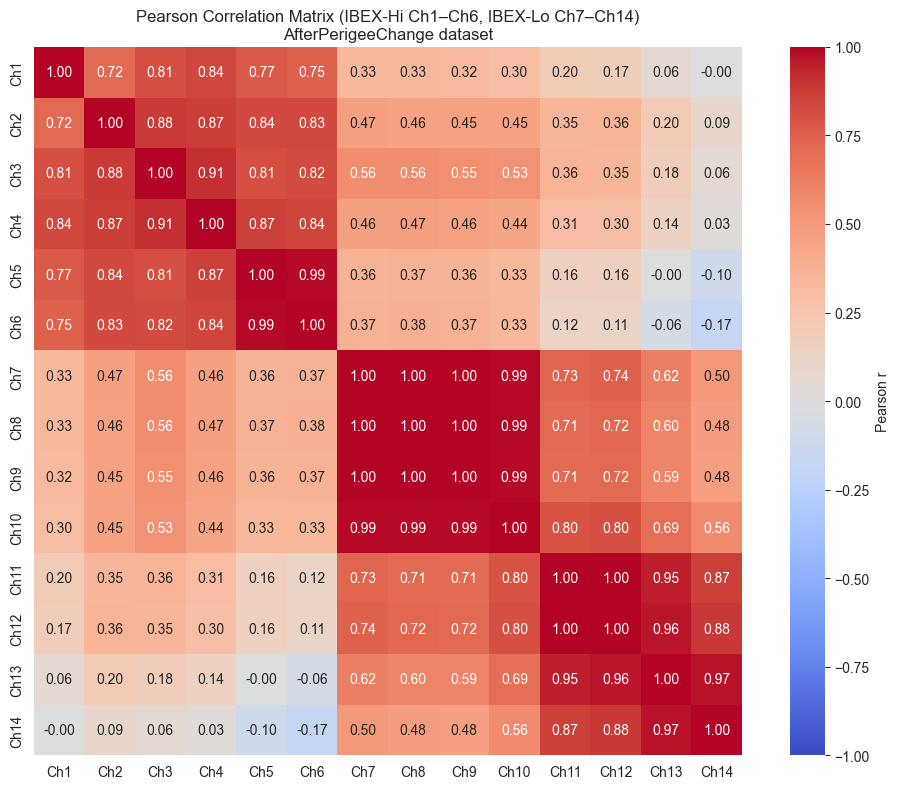

In [56]:
all_channels = []
lengths = []

for i in range(1, 15):  # 1..14
    counts, mid_times = ibex.load_data(
        f"channel_analyzer_out_old/BeforePerigeeChange/channel_{i}_good_data.txt"
    )
    grid_time, interpolated_counts, mvp = ibex.interpolate_trapezoid(
        counts, mid_times, 18
    )
    all_channels.append(interpolated_counts)
    lengths.append(counts.shape[0])

max_len = min(lengths)
print("Min length:", max_len)
print("Lengths:", lengths)
rates = np.array(all_channels).T
channel_labels = [f"Ch{i}" for i in range(1, 15)]
ibex.plot_correlation_matrix(
    rates=rates,
    title="Pearson Correlation Matrix (IBEX-Hi Ch1–Ch6, IBEX-Lo Ch7–Ch14)\nAfterPerigeeChange dataset",
    channel_labels=channel_labels
)

Min length: 186
Lengths: [1526, 2837, 3492, 4424, 4766, 4291, 267, 186, 186, 186, 186, 200, 267, 267]


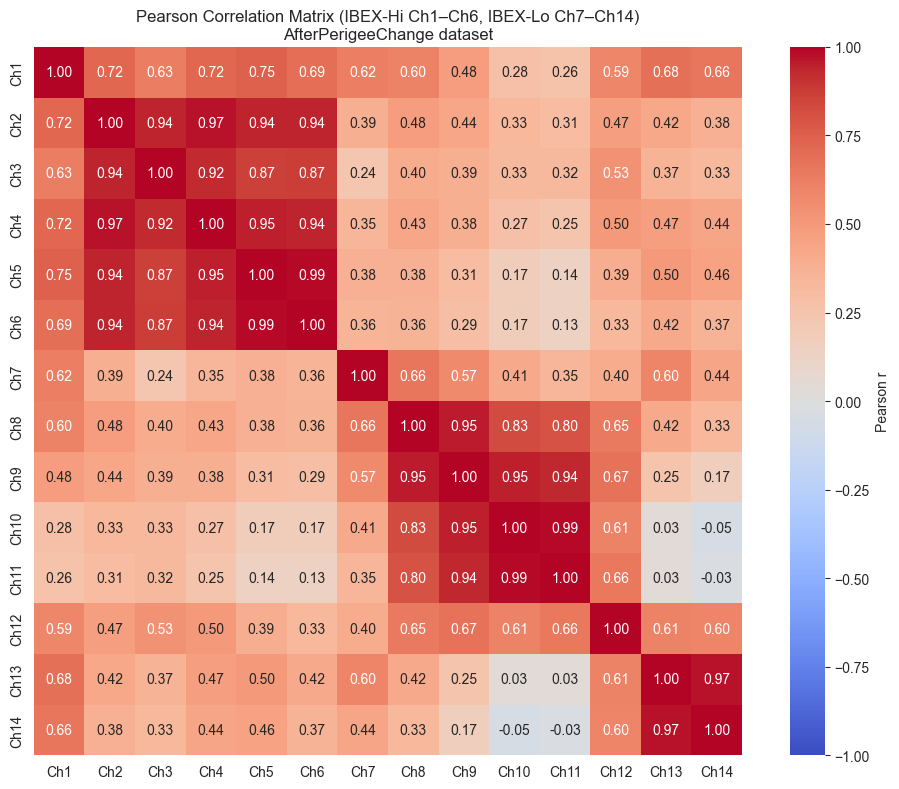

In [57]:
all_channels = []
lengths = []

for i in range(1, 15):  # 1..14
    counts, mid_times = ibex.load_data(
        f"channel_analyzer_out_old/AfterPerigeeChange/channel_{i}_good_data.txt"
    )

    grid_time, interpolated_counts, mvp = ibex.interpolate_trapezoid(
        counts, mid_times, 18
    )

    all_channels.append(interpolated_counts)
    lengths.append(counts.shape[0])

max_len = min(lengths)
print("Min length:", max_len)
print("Lengths:", lengths)
rates = np.array(all_channels).T
channel_labels = [f"Ch{i}" for i in range(1, 15)]
ibex.plot_correlation_matrix(
    rates=rates,
    title="Pearson Correlation Matrix (IBEX-Hi Ch1–Ch6, IBEX-Lo Ch7–Ch14)\nAfterPerigeeChange dataset",
    channel_labels=channel_labels
)

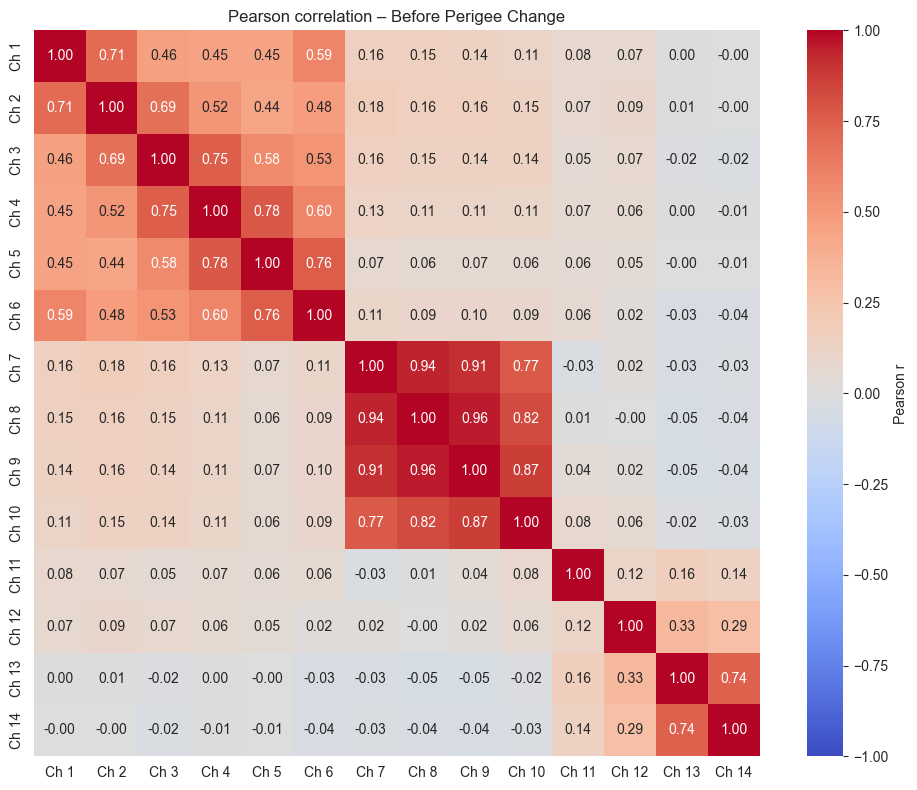

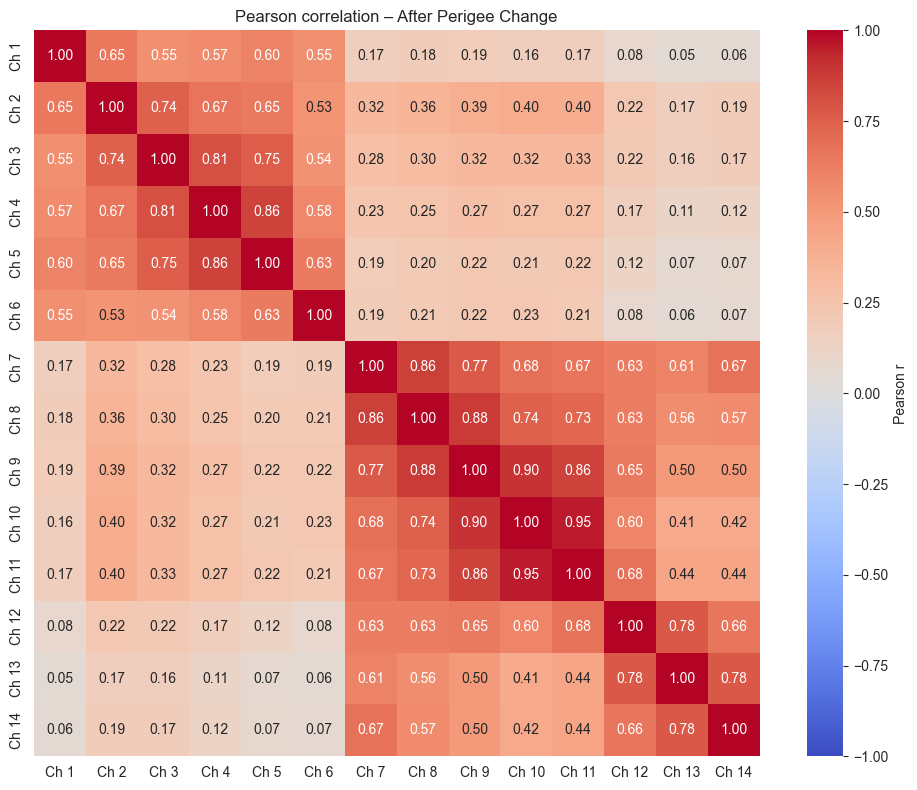

In [11]:
ibex.plot_correlation_matrix(
    rates_before,
    "Pearson correlation – Before Perigee Change"
)

ibex.plot_correlation_matrix(
    rates_after,
    "Pearson correlation – After Perigee Change"
)

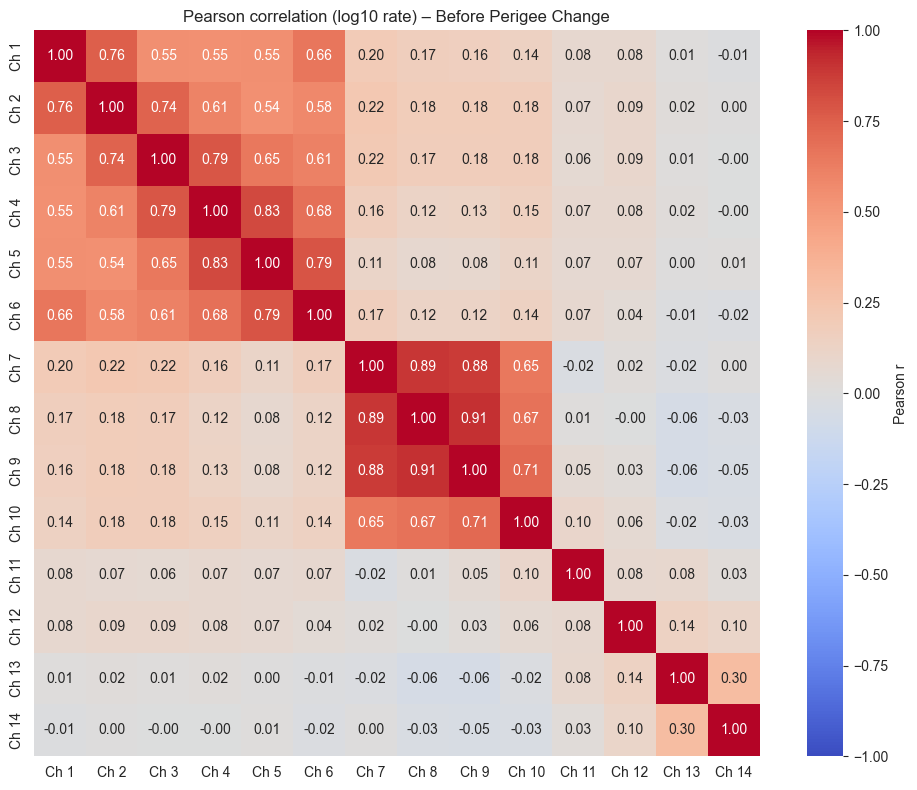

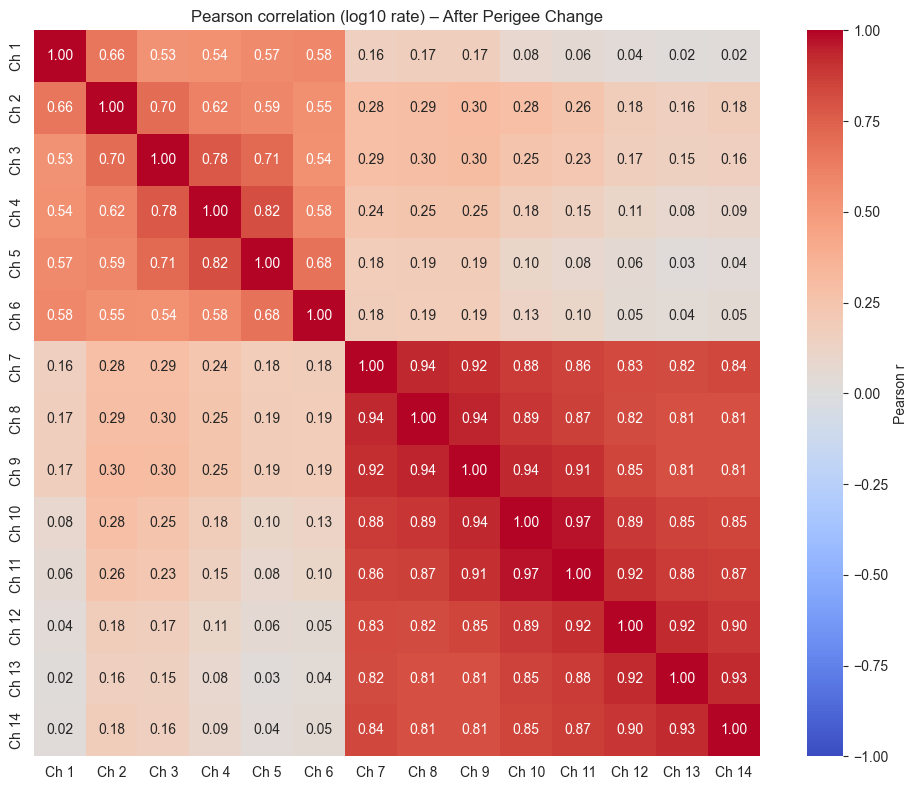

In [13]:
rates_before_log = np.log10(rates_before + 1e-6)
rates_after_log = np.log10(rates_after + 1e-6)
ibex.plot_correlation_matrix(
    rates_before_log,
    "Pearson correlation (log10 rate) – Before Perigee Change"
)
ibex.plot_correlation_matrix(
    rates_after_log,
    "Pearson correlation (log10 rate) – After Perigee Change"
)

# PCA
## Analiza PCA przeprowadzona niezależnie dla zbiorów danych BeforePerigeeChange i AfterPerigeeChange
### Opis procesu
- Sumy zliczeń ENA są poddawane transformacji log10(x)
- Standaryzacja danych (średnia = 0, odchylenie standardowe = 1)
### Wizualizacja
- Wykres wariancji wyjaśnianej względem składowych głównych - określa stopień redukcji wymiarowości oraz, która ze składowych głównych opisuje największy procent danych
- Wizualizacja wkładu poszczególnych kanałów na pierwsze dwie składowe główne (PC1 i PC2)
- Projekcja próbek danych na przestrzeń dwóch pierwszych składowych głównych - do oceny struktury danych.

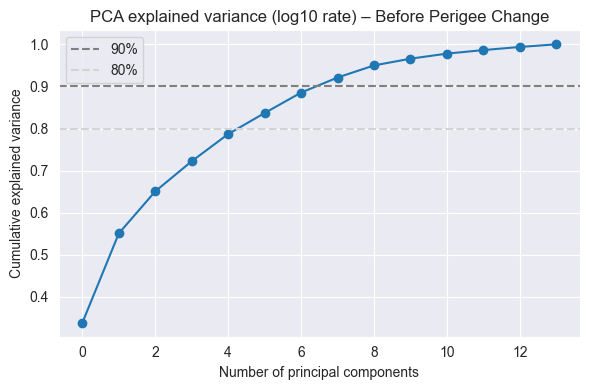

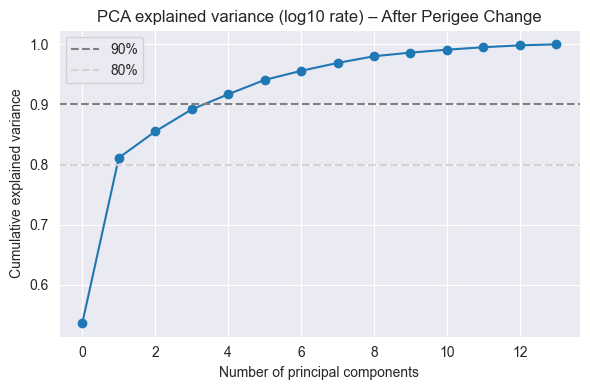

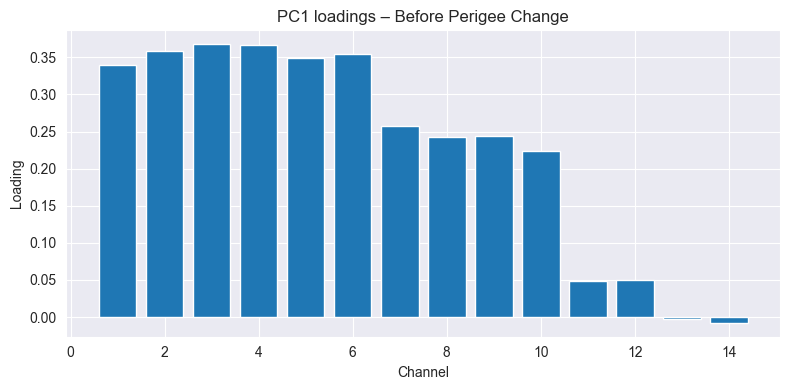

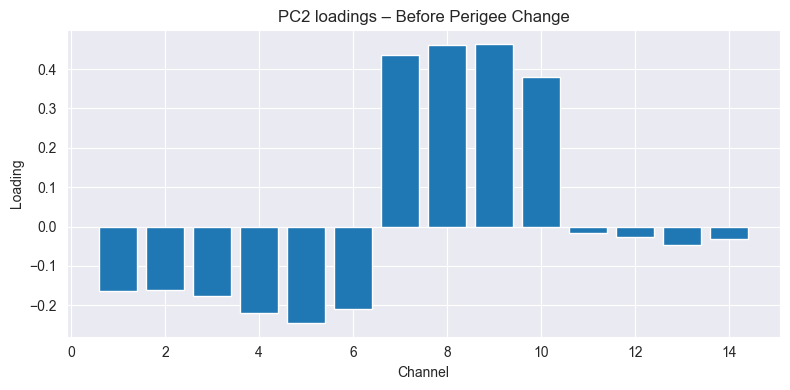

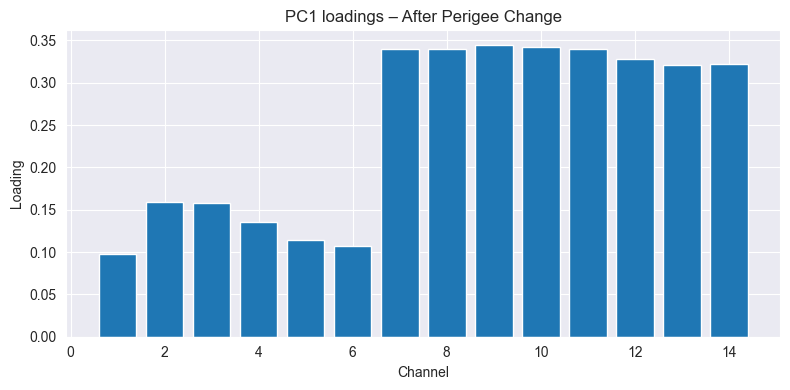

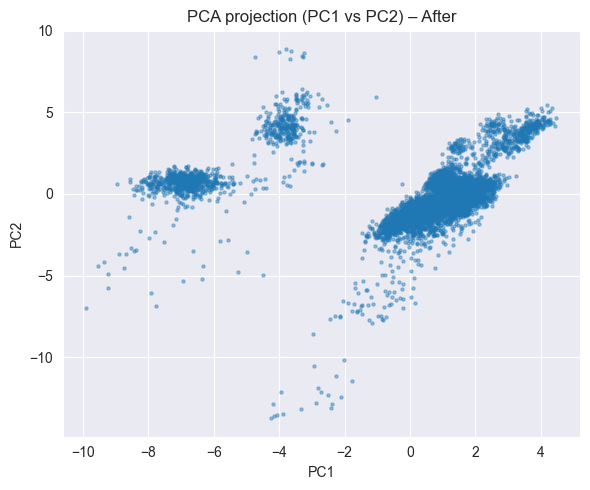

In [23]:
rates_before, _ = ibex.load_dataset("aggregated_data_for_autoencoder/BeforePerigeeChange")
rates_after, _ = ibex.load_dataset("aggregated_data_for_autoencoder/AfterPerigeeChange")
rates_before_log = np.log10(rates_before + 1e-6)
rates_after_log = np.log10(rates_after + 1e-6)
Xb, scaler_b = ibex.standardize(rates_before_log)
Xa, scaler_a = ibex.standardize(rates_after_log)
pca = PCA()
pca_before, Z_before = ibex.run_pca(Xb)
pca_after,  Z_after  = ibex.run_pca(Xa)
ibex.plot_explained_variance(pca_before, "PCA explained variance (log10 rate) – Before Perigee Change")
ibex.plot_explained_variance(pca_after, "PCA explained variance (log10 rate) – After Perigee Change")
ibex.plot_loadings(pca_before, 0, "PC1 loadings – Before Perigee Change")
ibex.plot_loadings(pca_before, 1, "PC2 loadings – Before Perigee Change")
ibex.plot_loadings(pca_after, 0, "PC1 loadings – After Perigee Change")
ibex.plot_loadings(pca_after, 1, "PC2 loadings – After Perigee Change")
ibex.plot_projection(Z_before, "PCA projection (PC1 vs PC2) – Before")
ibex.plot_projection(Z_after,  "PCA projection (PC1 vs PC2) – After")

# MLP Regressor (1)
## Zastosowanie modelu MLP Regressor do predykcji pełnych wektorowych opisów maskowanego kanału na podstawie pozostałych. Dotyczy 4 komórek poniżej.
### Opis procesu:
- Wczytanie danych w postaci próbek wektorów zaggregowanych cech postaci: ["sum", "rate", "cos_RA", "sin_RA", "R_RA", "cos_phase", "sin_phase", "R_phase", "mean_X", "mean_Y", "mean_Z", "std_X", "std_Y", "std_Z","mean_R", "std_R"]
- Podział na zestaw treningowy i testowy (80% trening, 20% test)
- Trening predykcji pełnych wektorów zaggregowanych cech maskowanego kanału na podstawie pozostałych
- Test modelu
### Wizualizacja
- Zestaw wykresów y_pred vs y_train w formacie 4x4 dla każdej cechy predykowanego kanału
- Zestaw wykresów y_pred vs y_test w formacie 4x4 dla każdej cechy predykowanego kanału
- Wykres przebiegu treningu w postaci krzywej funkcji straty na epokę

In [41]:
save_path = "rzeczy do inż/MLPRegressor/BeforePerigeeChange"
for i in range(1, 15):
    X_train, X_test, y_train, y_test, scaler_X, scaler_y = ibex.load_datasets("channel_analyzer_out_aggregated/BeforePerigeeChange", i)

    mlp = MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        learning_rate_init=1e-3,
        max_iter=5000,
        random_state=42,
        tol=1e-6
    )

    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred  = mlp.predict(X_test)

    ibex.print_and_save_metrics(i, save_path, y_test, y_train, y_test_pred, y_train_pred, scaler_y)

    y_train_true_phys = scaler_y.inverse_transform(y_train)
    y_train_pred_phys = scaler_y.inverse_transform(y_train_pred)
    y_test_true_phys  = scaler_y.inverse_transform(y_test)
    y_test_pred_phys  = scaler_y.inverse_transform(y_test_pred)

    FEATURE_NAMES = ["sum", "rate", "cos_RA", "sin_RA", "R_RA", "cos_phase", "sin_phase", "R_phase", "mean_X", "mean_Y", "mean_Z", "std_X", "std_Y", "std_Z","mean_R", "std_R"]
    ibex.generate_and_save_training_and_test_plot_sets(i, save_path, FEATURE_NAMES, scaler_y, y_test, y_train, y_test_pred, y_train_pred)
    if i <= 6:
        channel_dir = f"Hi_{i}"
    else:
        channel_dir = f"Lo_{i}"
    # --- Training loss ---
    save_dir = os.path.join(save_path, channel_dir)
    save_path_plot = os.path.join(save_dir, f"loss_curve_channel_{i}.png")
    ibex.plot_loss_curves(mlp, save_path_plot, False)

Using common length: 62
X shape: (62, 208)
y shape: (62, 16)
############# TARGET CHANNEL = 1 #############
==== TRAINING ====
RMSE (global): 0.0174
MAE  (global): 0.0116
RMSE/STD (global): 0.0174
RMSE (physical units): 11.9200
MAE  (physical units): 1.8834
RMSE/STD (physical units): 0.0098
==== TEST ====
RMSE (global): 1.8874
MAE  (global): 1.2797
RMSE/STD (global): 1.1656
RMSE (physical units): 1584.2347
MAE  (physical units): 306.4430
RMSE/STD (physical units): 0.8275

Using common length: 62
X shape: (62, 208)
y shape: (62, 16)
############# TARGET CHANNEL = 2 #############
==== TRAINING ====
RMSE (global): 0.0214
MAE  (global): 0.0141
RMSE/STD (global): 0.0214
RMSE (physical units): 14.9469
MAE  (physical units): 2.2660
RMSE/STD (physical units): 0.0107
==== TEST ====
RMSE (global): 1.5968
MAE  (global): 1.2459
RMSE/STD (global): 1.3713
RMSE (physical units): 1085.1249
MAE  (physical units): 233.5763
RMSE/STD (physical units): 1.2767

Using common length: 62
X shape: (62, 208)
y s

In [42]:
save_path = "rzeczy do inż/MLPRegressor/AfterPerigeeChange"
for i in range(1, 15):
    X_train, X_test, y_train, y_test, scaler_X, scaler_y = ibex.load_datasets("channel_analyzer_out_aggregated/AfterPerigeeChange", i)

    mlp = MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        learning_rate_init=1e-3,
        max_iter=5000,
        random_state=42,
        tol=1e-6
    )

    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred  = mlp.predict(X_test)

    ibex.print_and_save_metrics(i, save_path, y_test, y_train, y_test_pred, y_train_pred, scaler_y)

    y_train_true_phys = scaler_y.inverse_transform(y_train)
    y_train_pred_phys = scaler_y.inverse_transform(y_train_pred)
    y_test_true_phys  = scaler_y.inverse_transform(y_test)
    y_test_pred_phys  = scaler_y.inverse_transform(y_test_pred)

    FEATURE_NAMES = ["sum", "rate", "cos_RA", "sin_RA", "R_RA", "cos_phase", "sin_phase", "R_phase", "mean_X", "mean_Y", "mean_Z", "std_X", "std_Y", "std_Z","mean_R", "std_R"]
    ibex.generate_and_save_training_and_test_plot_sets(i, save_path, FEATURE_NAMES, scaler_y, y_test, y_train, y_test_pred, y_train_pred)
    if i <= 6:
        channel_dir = f"Hi_{i}"
    else:
        channel_dir = f"Lo_{i}"
    #Training loss plot
    save_dir = os.path.join(save_path, channel_dir)
    save_path_plot = os.path.join(save_dir, f"loss_curve_channel_{i}.png")
    ibex.plot_loss_curves(mlp, save_path_plot, False)

Using common length: 186
X shape: (186, 208)
y shape: (186, 16)
############# TARGET CHANNEL = 1 #############
==== TRAINING ====
RMSE (global): 0.0321
MAE  (global): 0.0200
RMSE/STD (global): 0.0321
RMSE (physical units): 16.9251
MAE  (physical units): 2.8604
RMSE/STD (physical units): 0.0302
==== TEST ====
RMSE (global): 1.1850
MAE  (global): 0.9348
RMSE/STD (global): 1.1226
RMSE (physical units): 420.2234
MAE  (physical units): 80.2688
RMSE/STD (physical units): 0.8037

Using common length: 186
X shape: (186, 208)
y shape: (186, 16)
############# TARGET CHANNEL = 2 #############
==== TRAINING ====
RMSE (global): 0.0363
MAE  (global): 0.0201
RMSE/STD (global): 0.0363
RMSE (physical units): 13.8665
MAE  (physical units): 2.6524
RMSE/STD (physical units): 0.0279
==== TEST ====
RMSE (global): 1.2020
MAE  (global): 0.8915
RMSE/STD (global): 0.9955
RMSE (physical units): 380.7520
MAE  (physical units): 69.2718
RMSE/STD (physical units): 0.7196

Using common length: 186
X shape: (186, 208)

Using common length: 62
X shape: (62, 208)
y shape: (62, 16)
==== TRAINING ====
RMSE (global): 0.0113
MAE  (global): 0.0061
RMSE (physical units): 4.6452
MAE  (physical units): 0.7465
==== TEST ====

TARGET CHANNEL = 1
RMSE (global): 1.8676
MAE  (global): 1.2583
RMSE (physical units): 1958.4136
MAE  (physical units): 367.2285


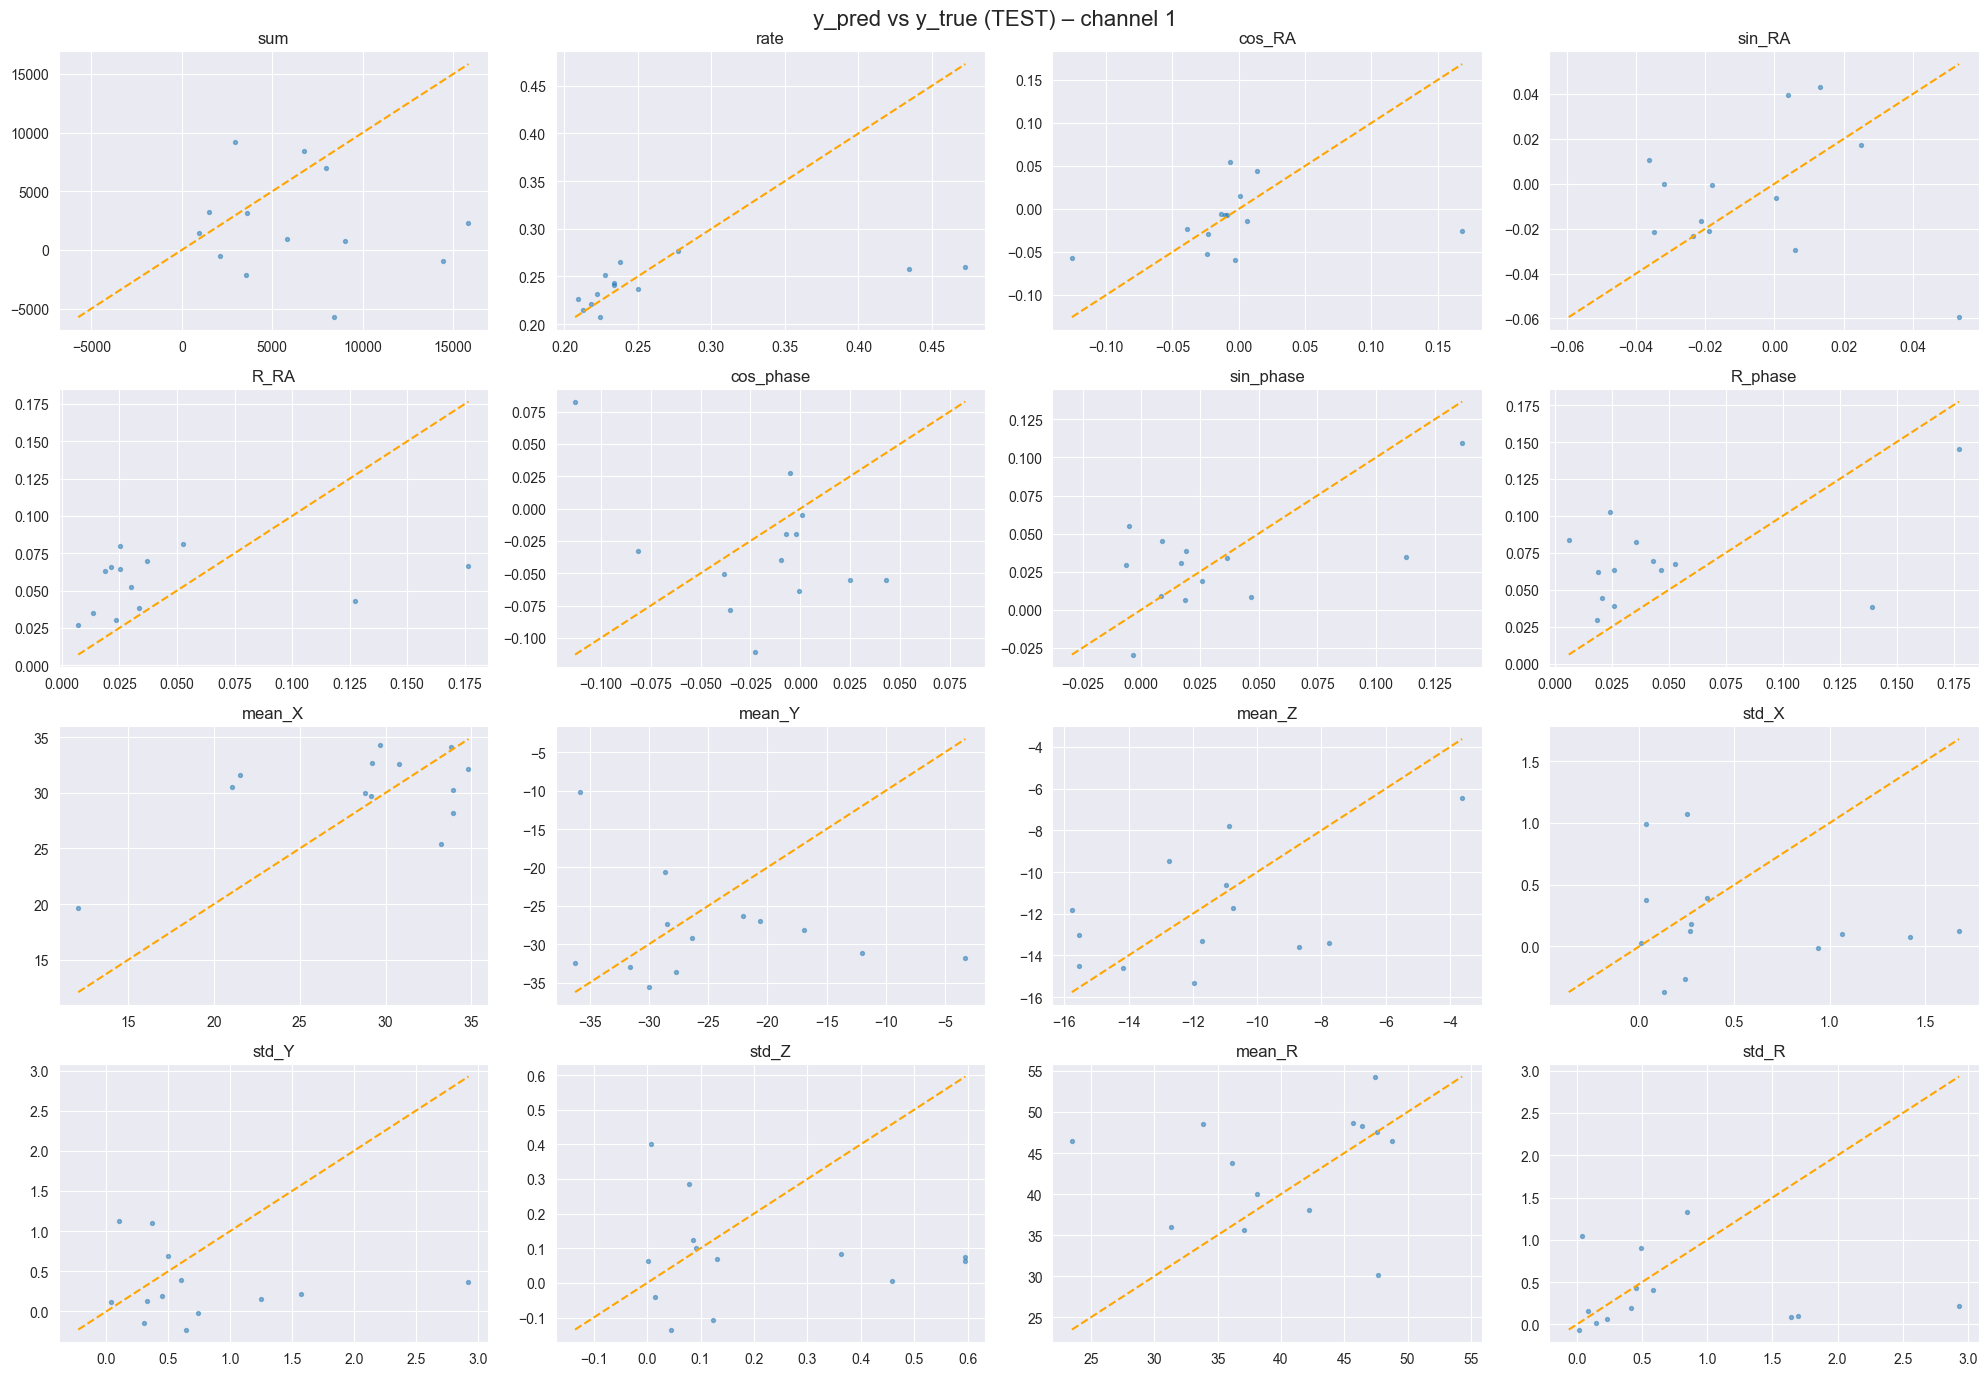

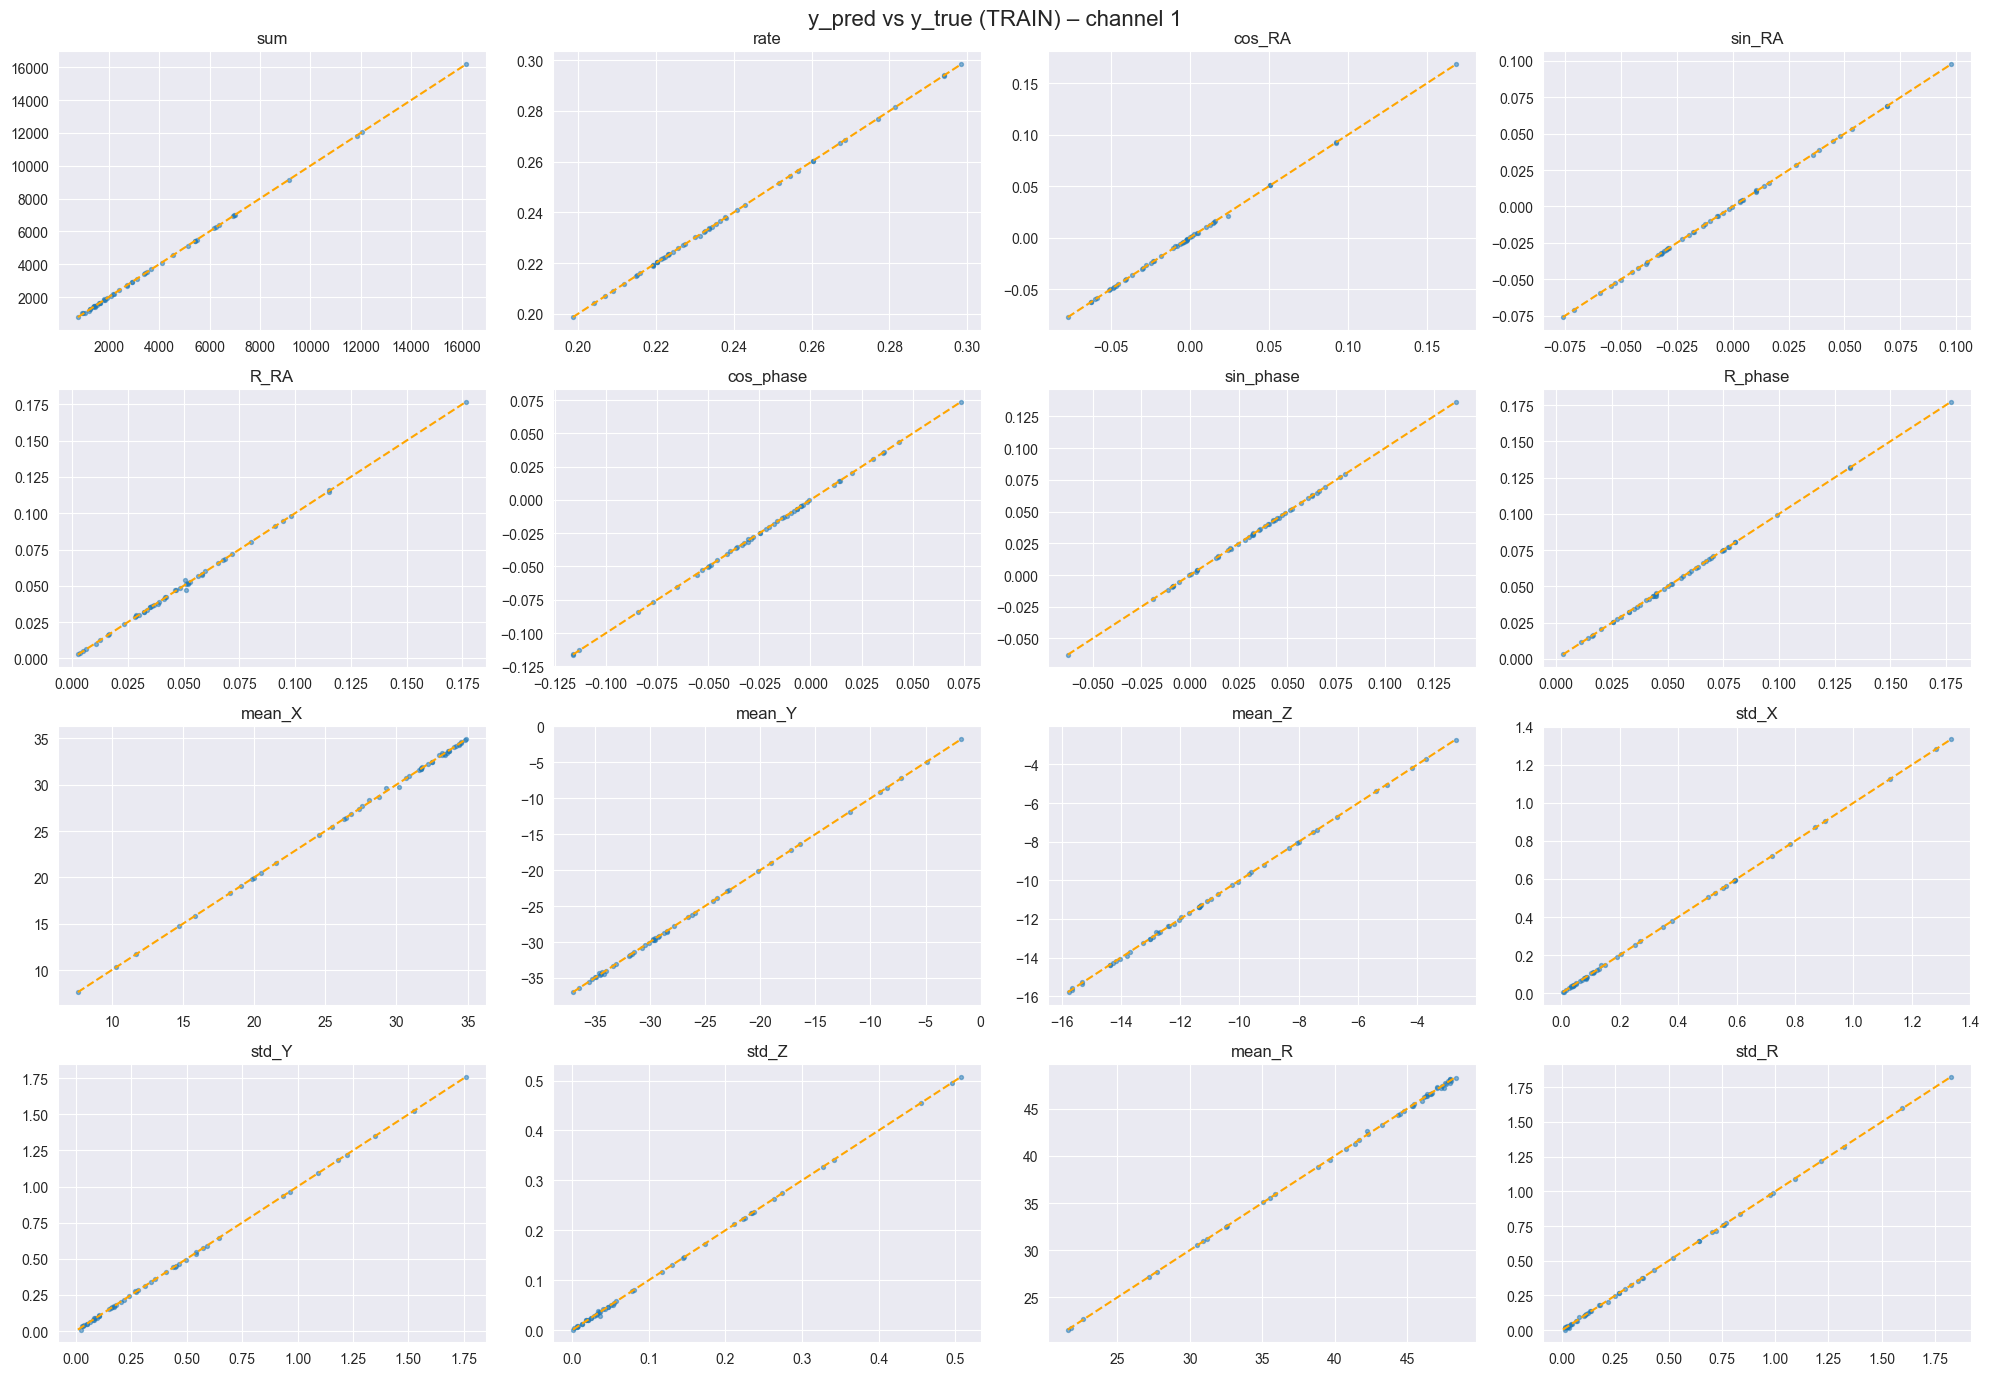

In [53]:
# CONF
from sklearn.linear_model import RidgeCV
DATA_DIR = "channel_analyzer_out_aggregated/BeforePerigeeChange"
TARGET_CHANNEL = 1

FEATURE_IDXS = [
    0,      # sum
    4,      # rate
    5, 6, 7,
    8, 9, 10
    ,11, 12, 13,
    14, 15, 16,
    17, 18
]
# LOAD DATA
channel_data = {}
lengths = []

for ch in range(1, 15):
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    data = np.loadtxt(path, skiprows=1)
    channel_data[ch] = data
    lengths.append(len(data))

min_len = min(lengths)
print("Using common length:", min_len)
# BUILD X, y
X_list = []
y_list = []

for i in range(min_len):
    x_row = []

    for ch in range(1, 15):
        features = channel_data[ch][i, FEATURE_IDXS]

        if ch == TARGET_CHANNEL:
            y_row = features
        else:
            x_row.extend(features)

    X_list.append(x_row)
    y_list.append(y_row)

X = np.array(X_list)
y = np.array(y_list)

print("X shape:", X.shape)
print("y shape:", y.shape)
#SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# SCALE
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)
alphas = np.logspace(-4, 4, 30)
# MODEL
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-4,
    max_iter=10000,
    tol=1e-7
)
# model = Ridge(
#     alpha=0.1,
#     fit_intercept=True
# )
# model = RidgeCV(
#     alphas=alphas,
#     cv=5,                 # 5-fold CV
#     fit_intercept=True,
#     scoring="neg_mean_squared_error"
# )
mlp.fit(X_train, y_train)
# model.fit(X_train, y_train)
# print("Best alpha selected by CV:", model.alpha_)
# PREDICT
y_train_pred = mlp.predict(X_train)
y_test_pred  = mlp.predict(X_test)
# y_train_pred = model.predict(X_train)
# y_test_pred  = model.predict(X_test)
# METRICS (global)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae  = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
# INVERSE SCALE (y)
y_train_true_phys = scaler_y.inverse_transform(y_train)
y_train_pred_phys = scaler_y.inverse_transform(y_train_pred)
y_test_true_phys  = scaler_y.inverse_transform(y_test)
y_test_pred_phys  = scaler_y.inverse_transform(y_test_pred)
rmse_phys = np.sqrt(mean_squared_error(y_test_true_phys, y_test_pred_phys))
mae_phys  = mean_absolute_error(y_test_true_phys, y_test_pred_phys)
rmse_phys_train = np.sqrt(mean_squared_error(y_train_true_phys, y_train_pred_phys))
mae_phys_train  = mean_absolute_error(y_train_true_phys, y_train_pred_phys)
print("==== TRAINING ====")
print(f"RMSE (global): {rmse_train:.4f}")
print(f"MAE  (global): {mae_train:.4f}")
print(f"RMSE (physical units): {rmse_phys_train:.4f}")
print(f"MAE  (physical units): {mae_phys_train:.4f}")

print("==== TEST ====")
print(f"\nTARGET CHANNEL = {TARGET_CHANNEL}")
print(f"RMSE (global): {rmse:.4f}")
print(f"MAE  (global): {mae:.4f}")
print(f"RMSE (physical units): {rmse_phys:.4f}")
print(f"MAE  (physical units): {mae_phys:.4f}")

# PLOTS
FEATURE_NAMES = [
    "sum", "rate",
    "cos_RA", "sin_RA", "R_RA",
    "cos_phase", "sin_phase", "R_phase"
    ,"mean_X", "mean_Y", "mean_Z",
    "std_X", "std_Y", "std_Z",
    "mean_R", "std_R"
]

#y_pred vs y_true (TEST)
fig, axes = plt.subplots(4, 4, figsize=(20, 14))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(y_test_true_phys[:, i], y_test_pred_phys[:, i], s=8, alpha=0.5)
    lims = [min(y_test_true_phys[:, i].min(), y_test_pred_phys[:, i].min()), max(y_test_true_phys[:, i].max(), y_test_pred_phys[:, i].max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)

plt.suptitle(f"y_pred vs y_true (TEST) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(20, 14))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(y_train_true_phys[:, i], y_train_pred_phys[:, i], s=8, alpha=0.5)
    lims = [min(y_train_true_phys[:, i].min(), y_train_pred_phys[:, i].min()), max(y_train_true_phys[:, i].max(), y_train_pred_phys[:, i].max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)

plt.suptitle(f"y_pred vs y_true (TRAIN) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()

#Training loss plot
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label="Training loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MLP training loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# coef = model.coef_          # shape: (n_targets, n_features)
# print("Ridge coefficients shape:", coef.shape)
# coef_norm = np.linalg.norm(coef, axis=0)

# plt.figure(figsize=(10, 4))
# plt.bar(range(len(coef_norm)), coef_norm)
# plt.xlabel("Feature index")
# plt.ylabel("||coef||")
# plt.title("RidgeCV – feature importance (L2 norm)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# fig, axes = plt.subplots(4, 4, figsize=(20, 14))
# axes = axes.flatten()

Using common length: 186
X shape: (186, 208)
y shape: (186, 16)
==== TRAINING ====
RMSE (global): 0.0191
MAE  (global): 0.0119
RMSE (physical units): 4.8594
MAE  (physical units): 0.8689
==== TEST ====

TARGET CHANNEL = 1
RMSE (global): 1.2298
MAE  (global): 0.9240
RMSE (physical units): 462.3011
MAE  (physical units): 89.9409


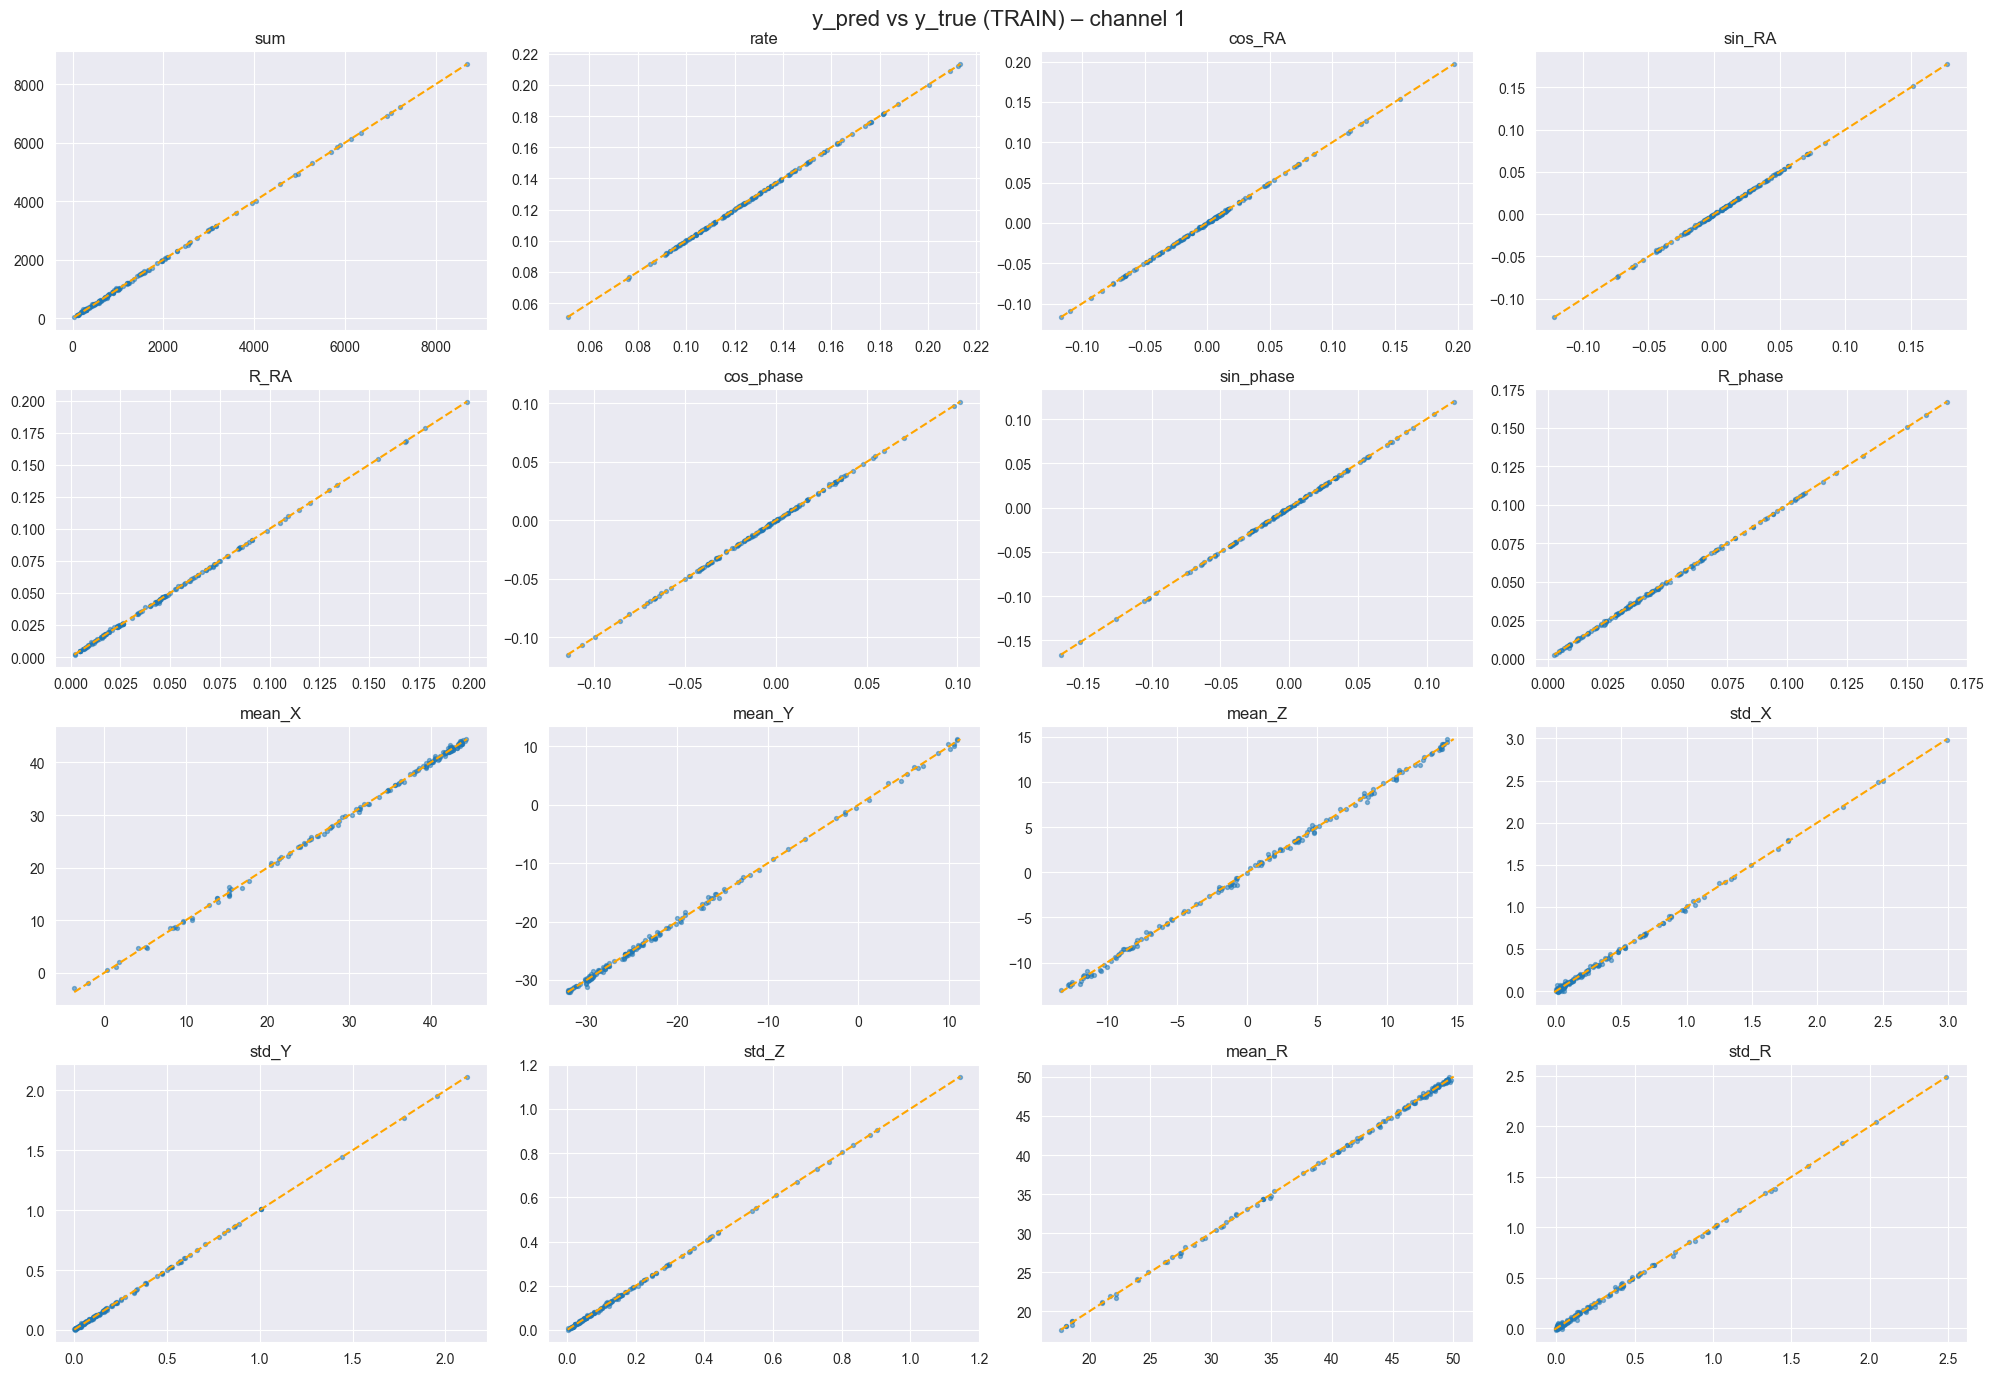

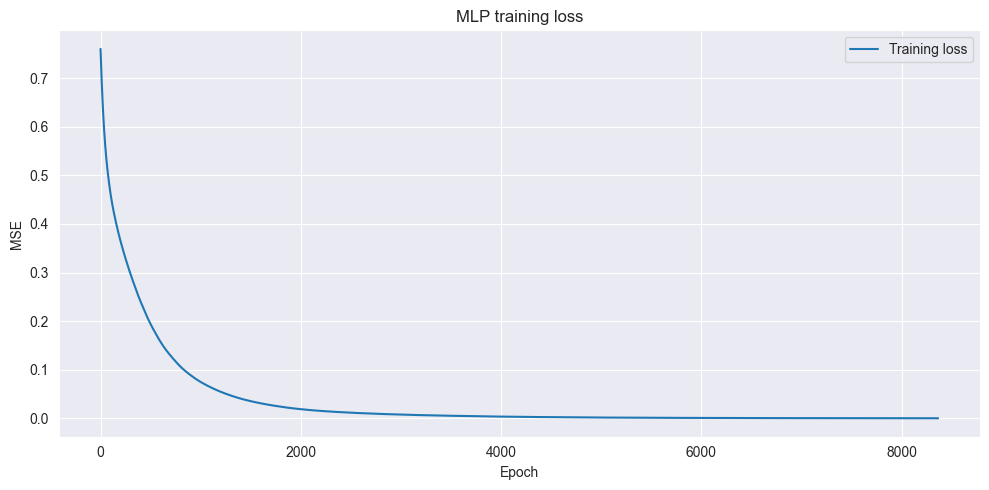

In [54]:
# CONF
from sklearn.linear_model import RidgeCV
DATA_DIR = "channel_analyzer_out_aggregated/AfterPerigeeChange"
TARGET_CHANNEL = 1

FEATURE_IDXS = [
    0,      # sum
    4,      # rate
    5, 6, 7,
    8, 9, 10
    ,11, 12, 13,
    14, 15, 16,
    17, 18
]
# LOAD DATA
channel_data = {}
lengths = []

for ch in range(1, 15):
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    data = np.loadtxt(path, skiprows=1)
    channel_data[ch] = data
    lengths.append(len(data))

min_len = min(lengths)
print("Using common length:", min_len)
# BUILD X, y
X_list = []
y_list = []

for i in range(min_len):
    x_row = []

    for ch in range(1, 15):
        features = channel_data[ch][i, FEATURE_IDXS]

        if ch == TARGET_CHANNEL:
            y_row = features
        else:
            x_row.extend(features)

    X_list.append(x_row)
    y_list.append(y_row)

X = np.array(X_list)
y = np.array(y_list)

print("X shape:", X.shape)
print("y shape:", y.shape)
#SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# SCALE
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)
alphas = np.logspace(-4, 4, 30)
# MODEL
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-4,
    max_iter=10000,
    tol=1e-7
)
# model = Ridge(
#     alpha=0.1,
#     fit_intercept=True
# )
# model = RidgeCV(
#     alphas=alphas,
#     cv=5,                 # 5-fold CV
#     fit_intercept=True,
#     scoring="neg_mean_squared_error"
# )
mlp.fit(X_train, y_train)
# model.fit(X_train, y_train)
# print("Best alpha selected by CV:", model.alpha_)
# PREDICT
y_train_pred = mlp.predict(X_train)
y_test_pred  = mlp.predict(X_test)
# y_train_pred = model.predict(X_train)
# y_test_pred  = model.predict(X_test)
# METRICS (global)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae  = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
# INVERSE SCALE (y)
y_train_true_phys = scaler_y.inverse_transform(y_train)
y_train_pred_phys = scaler_y.inverse_transform(y_train_pred)
y_test_true_phys  = scaler_y.inverse_transform(y_test)
y_test_pred_phys  = scaler_y.inverse_transform(y_test_pred)
rmse_phys = np.sqrt(mean_squared_error(y_test_true_phys, y_test_pred_phys))
mae_phys  = mean_absolute_error(y_test_true_phys, y_test_pred_phys)
rmse_phys_train = np.sqrt(mean_squared_error(y_train_true_phys, y_train_pred_phys))
mae_phys_train  = mean_absolute_error(y_train_true_phys, y_train_pred_phys)
print("==== TRAINING ====")
print(f"RMSE (global): {rmse_train:.4f}")
print(f"MAE  (global): {mae_train:.4f}")
print(f"RMSE (physical units): {rmse_phys_train:.4f}")
print(f"MAE  (physical units): {mae_phys_train:.4f}")

print("==== TEST ====")
print(f"\nTARGET CHANNEL = {TARGET_CHANNEL}")
print(f"RMSE (global): {rmse:.4f}")
print(f"MAE  (global): {mae:.4f}")
print(f"RMSE (physical units): {rmse_phys:.4f}")
print(f"MAE  (physical units): {mae_phys:.4f}")

# PLOTS
FEATURE_NAMES = [
    "sum", "rate",
    "cos_RA", "sin_RA", "R_RA",
    "cos_phase", "sin_phase", "R_phase"
    ,"mean_X", "mean_Y", "mean_Z",
    "std_X", "std_Y", "std_Z",
    "mean_R", "std_R"
]

#y_pred vs y_true (TEST)
fig, axes = plt.subplots(4, 4, figsize=(20, 14))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(y_test_true_phys[:, i], y_test_pred_phys[:, i], s=8, alpha=0.5)
    lims = [min(y_test_true_phys[:, i].min(), y_test_pred_phys[:, i].min()), max(y_test_true_phys[:, i].max(), y_test_pred_phys[:, i].max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)

plt.suptitle(f"y_pred vs y_true (TEST) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(20, 14))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(y_train_true_phys[:, i], y_train_pred_phys[:, i], s=8, alpha=0.5)
    lims = [min(y_train_true_phys[:, i].min(), y_train_pred_phys[:, i].min()), max(y_train_true_phys[:, i].max(), y_train_pred_phys[:, i].max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)

plt.suptitle(f"y_pred vs y_true (TRAIN) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()

#Training loss plot
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label="Training loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MLP training loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# coef = model.coef_          # shape: (n_targets, n_features)
# print("Ridge coefficients shape:", coef.shape)
# coef_norm = np.linalg.norm(coef, axis=0)

# plt.figure(figsize=(10, 4))
# plt.bar(range(len(coef_norm)), coef_norm)
# plt.xlabel("Feature index")
# plt.ylabel("||coef||")
# plt.title("RidgeCV – feature importance (L2 norm)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# fig, axes = plt.subplots(4, 4, figsize=(20, 14))
# axes = axes.flatten()

# Trening i test modelu MLP Regressor pod predykcję wartości sum zliczeń cząstek ENA dla maskowanego kanału na podstawie pozostałych.
## Dotyczy dwóch komórek poniżej (1 dla zestawu BeforePerigeeChange, 1 dla zestawu AfterPerigeeChange)
### Opis procesu
- Dla każdego kanału wyznaczany jest środek przedziału czasowego pomiaru (t_mid)
- Dane z pozostałych kanałów (tych, które idą na wejście sieci w treningu) są interpolowane liniowo do czasów t_mid kanału maskowanego. W efekcie mamy wspólną oś czasu dla wszystkich kanałów.
- Trening modelu MLP Regressor odbywa się na danych z pozostałych kanałów. Na wyjściu sieci predykowana jest suma zliczeń cząstek ENA dla zamaskowanego kanału.
- Dane są podzielone odpowiednio: Zestaw treningowy- 80%, Zestaw Testowy - 20%
### Wizualizacja i metryki
- Zestaw plotów y_pred vs y_test pod weryfikację skuteczności przewidywania sum zliczeń ENA w czasie dla kanału zamaskowanego
- Zestaw plotów y_pred vs y_train pod weryfikację przebiegu treningu (Czy jest overfitting lub underfitting)
- Zestaw plotów y_pred(t) + y_test(t) umożliwia porównanie predykcji sum zliczeń ena w czasie dla maskowanego kanału względem jego wartości rzeczywistych.
- W konsolę wypisywana jest wartość metryki **RMSE/std** dla każdego kanału.

D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  1 | RMSE/STD (TEST) = 0.266
Channel  2 | RMSE/STD (TEST) = 0.081
Channel  3 | RMSE/STD (TEST) = 0.146


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  4 | RMSE/STD (TEST) = 0.217
Channel  5 | RMSE/STD (TEST) = 0.202
Channel  6 | RMSE/STD (TEST) = 0.138


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  7 | RMSE/STD (TEST) = 0.237


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  8 | RMSE/STD (TEST) = 0.234


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  9 | RMSE/STD (TEST) = 0.234


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 10 | RMSE/STD (TEST) = 0.234


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 11 | RMSE/STD (TEST) = 0.234


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 12 | RMSE/STD (TEST) = 0.241


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 13 | RMSE/STD (TEST) = 0.325


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 14 | RMSE/STD (TEST) = 0.321


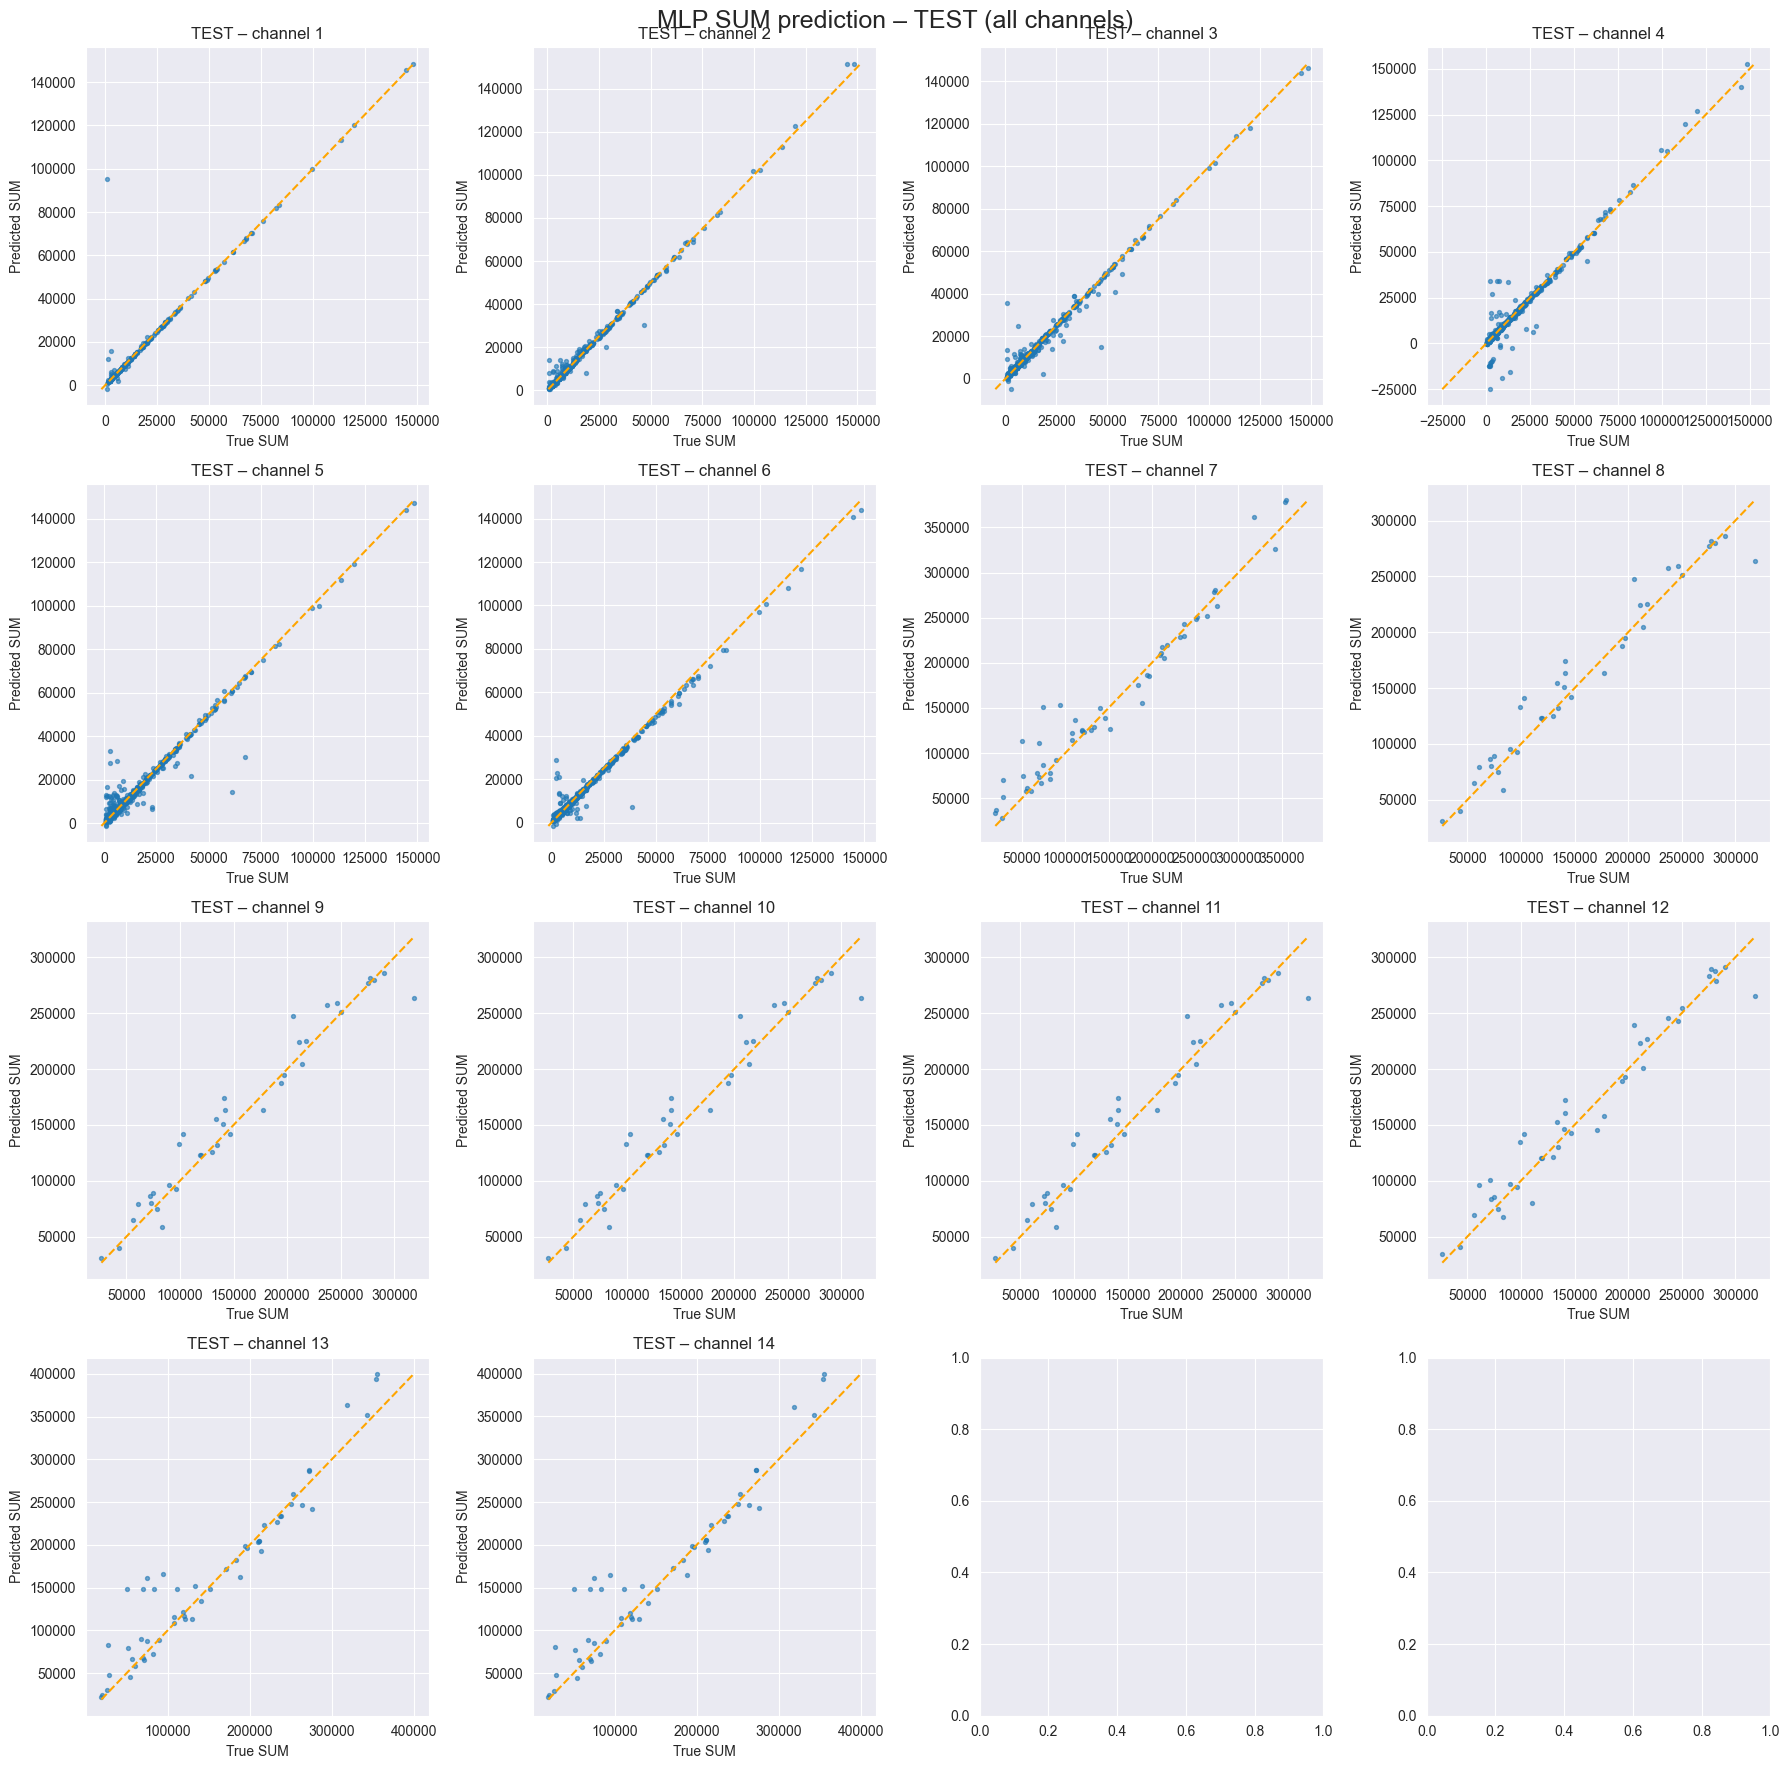

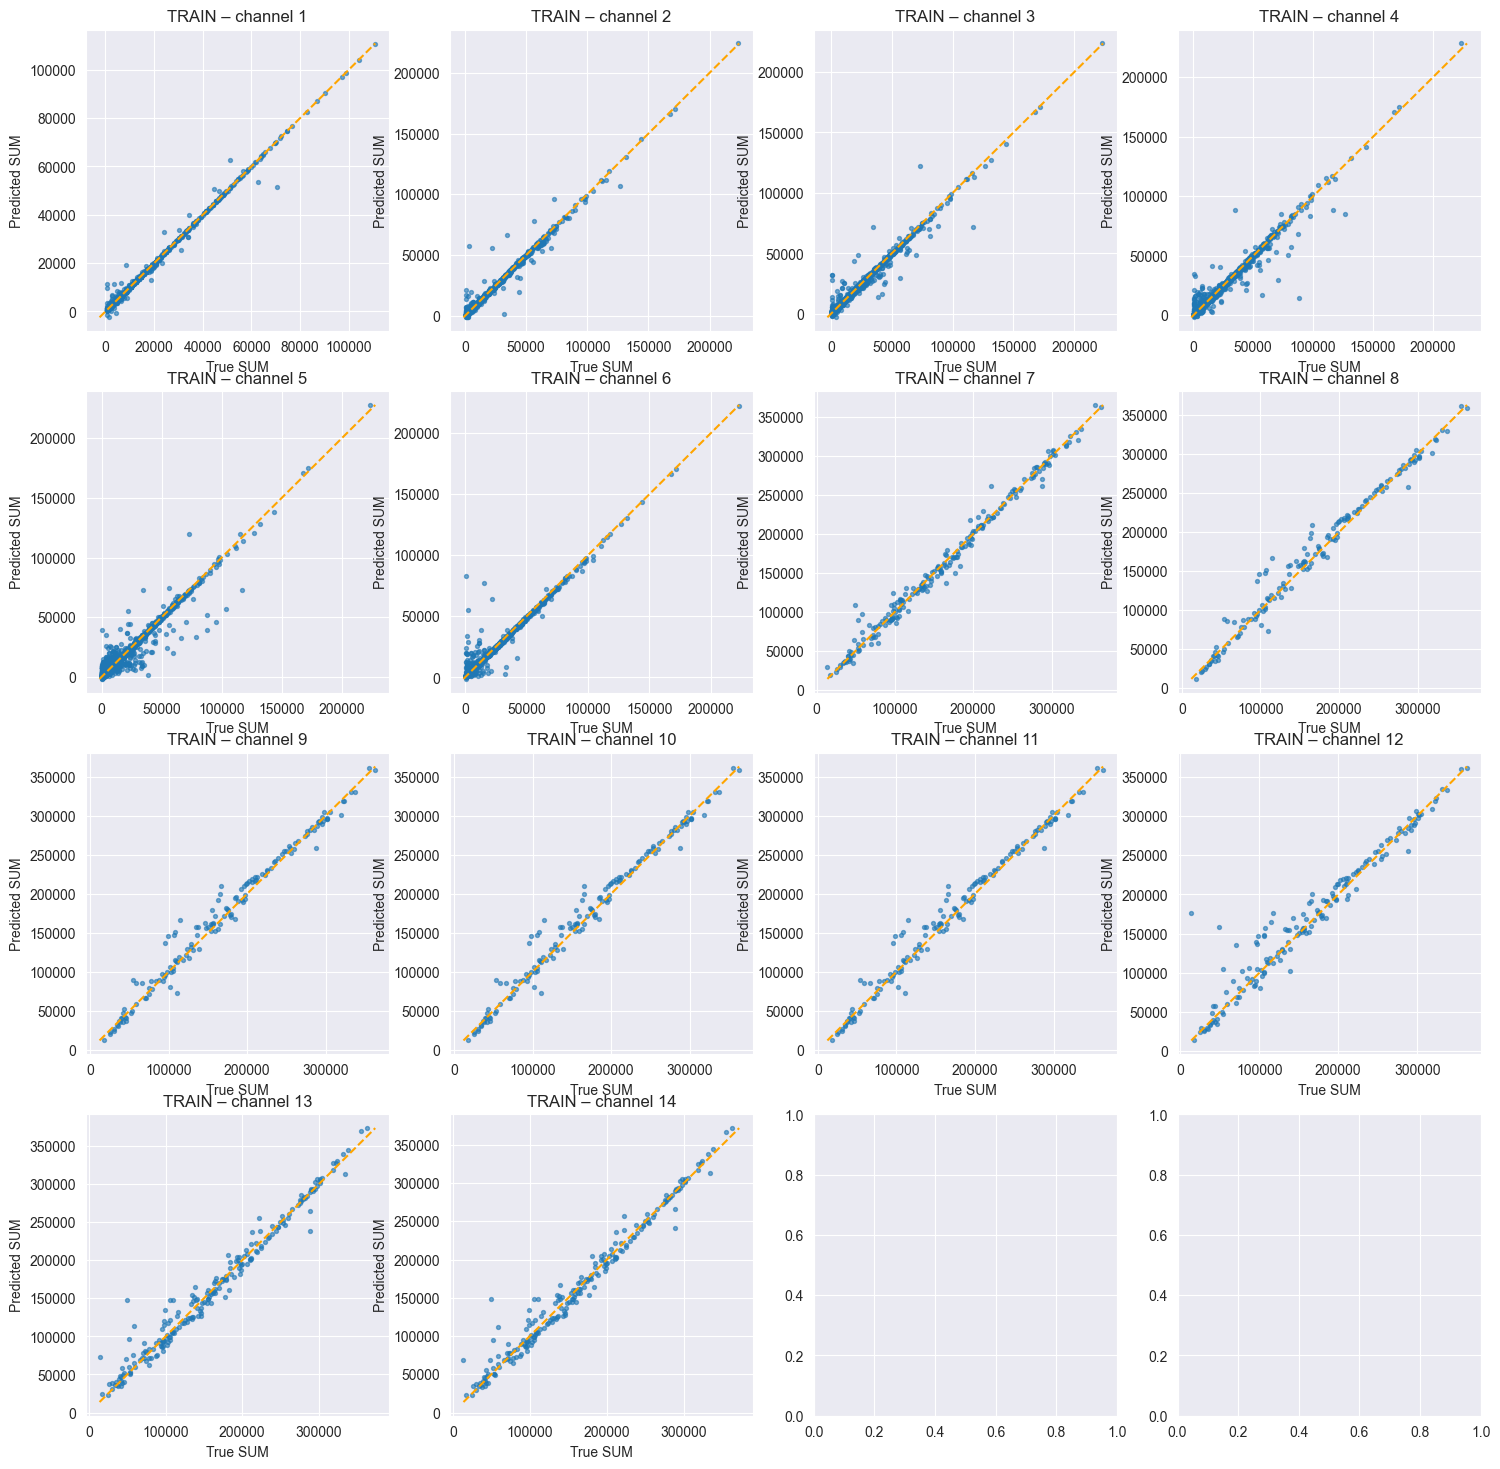

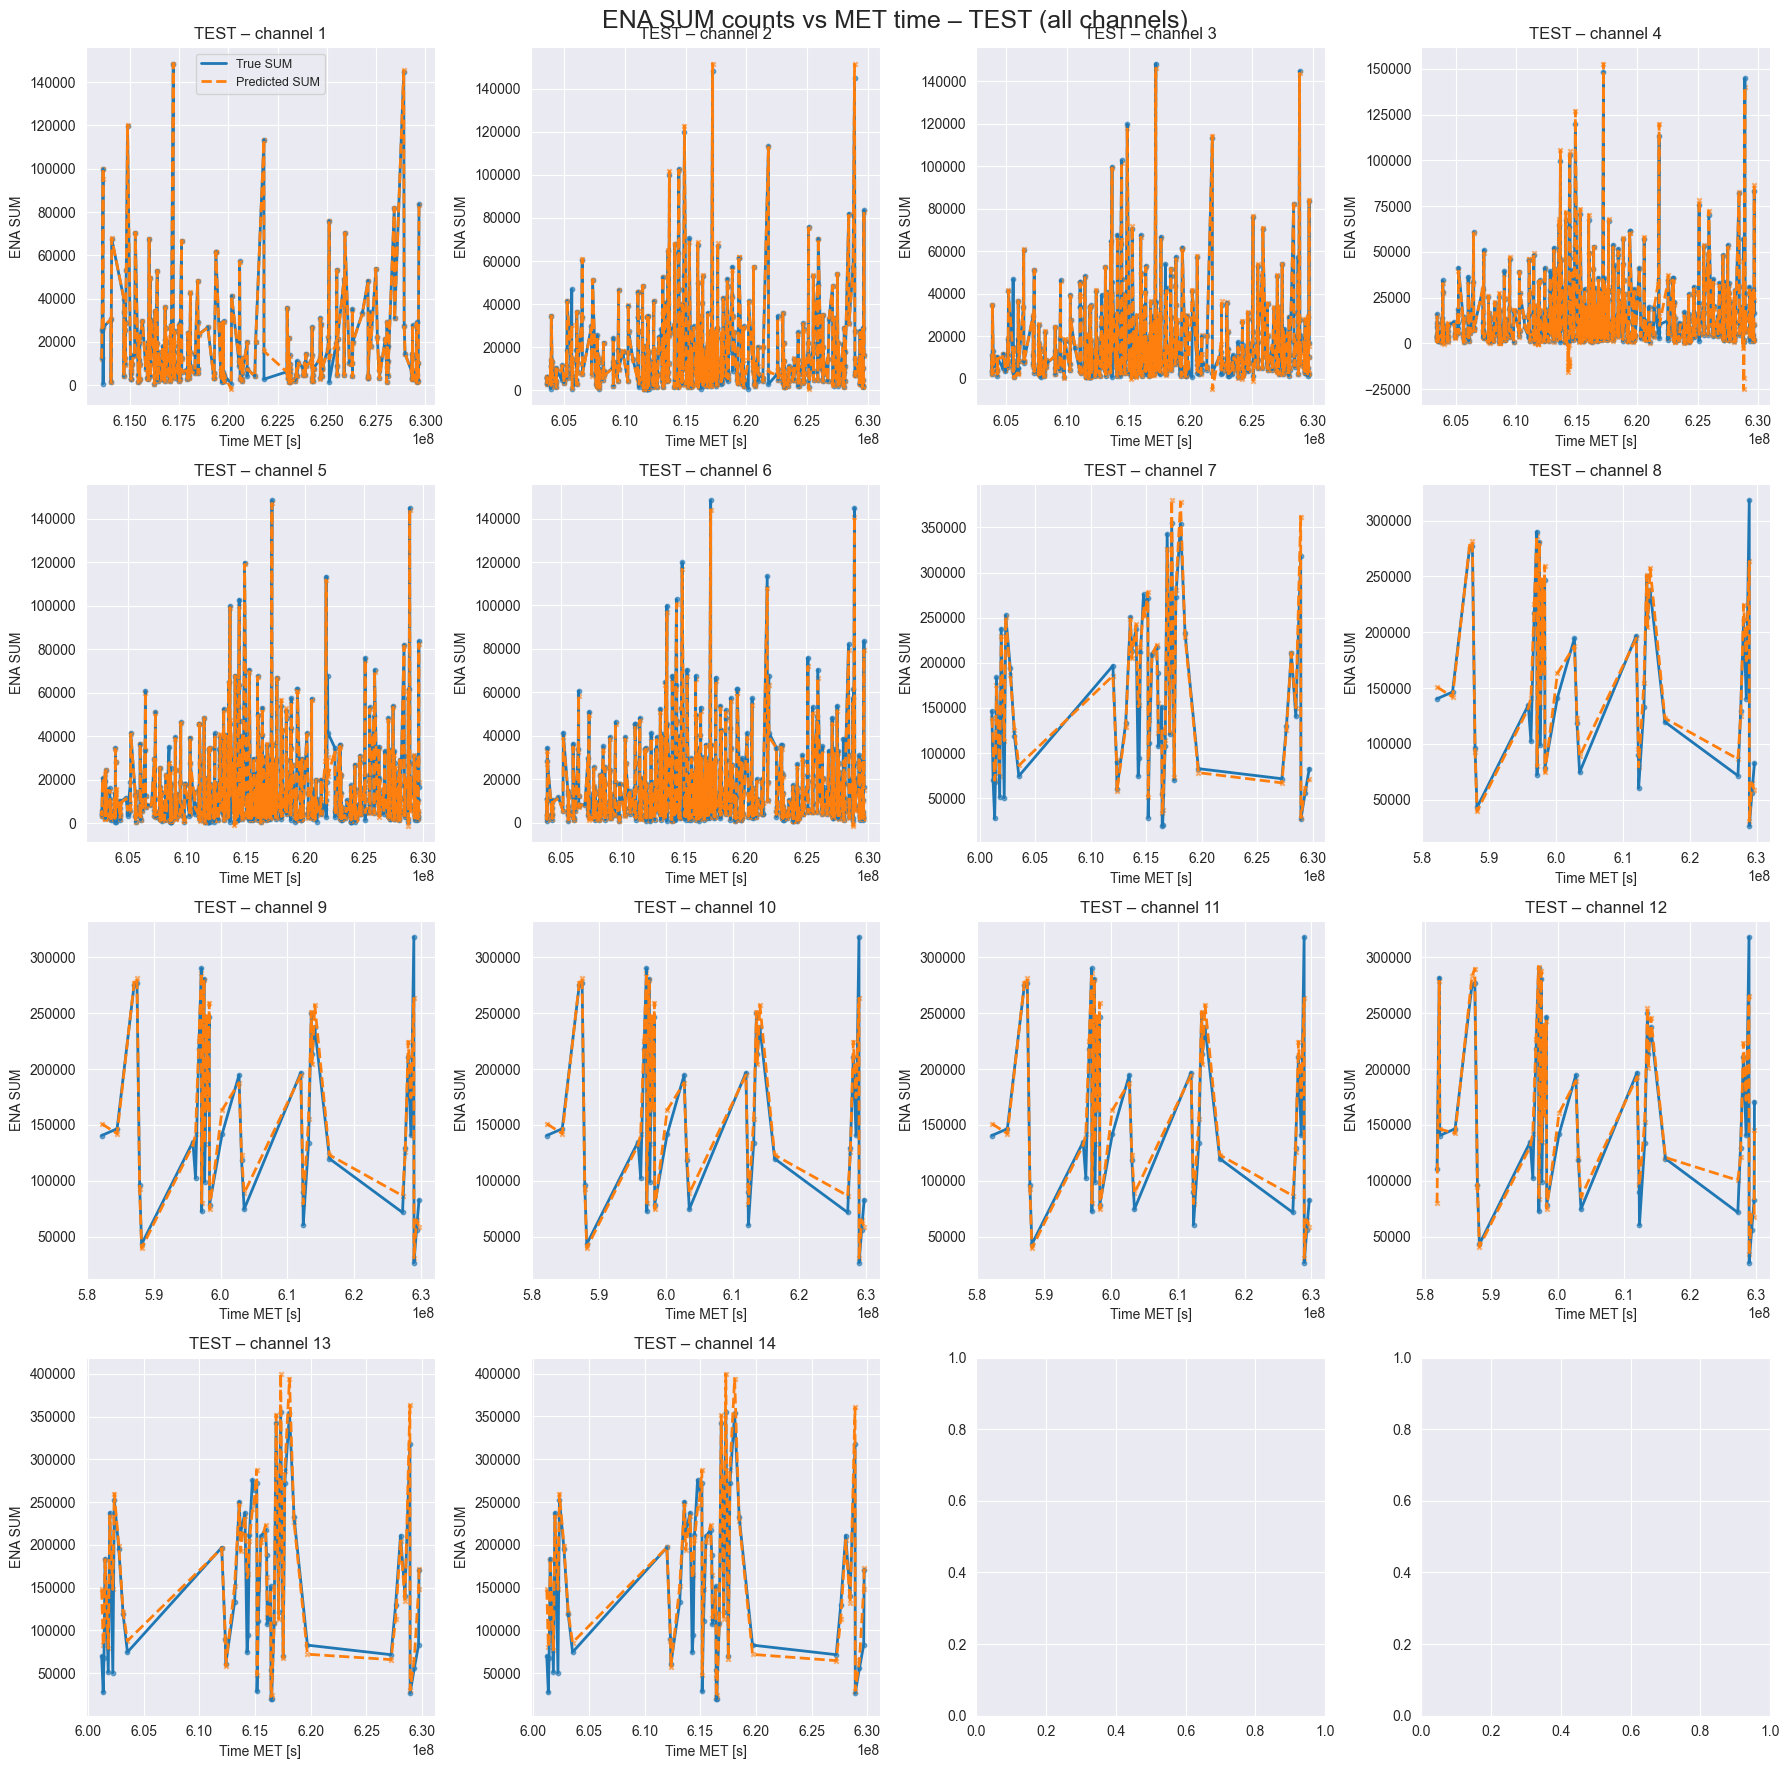

In [48]:
from scipy.interpolate import interp1d

DATA_DIR = "channel_analyzer_out_aggregated/AfterPerigeeChange"
SUM_IDX = 1
START_TIME_IDX = 3
END_TIME_IDX = 4
CHANNELS = range(1, 15)

channel_data = {}
for ch in CHANNELS:
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    channel_data[ch] = np.loadtxt(path, skiprows=1)

channel_interp = {}
for ch in CHANNELS:
    t_mid = 0.5 * (
        channel_data[ch][:, START_TIME_IDX] +
        channel_data[ch][:, END_TIME_IDX]
    )
    sums = channel_data[ch][:, SUM_IDX]

    order = np.argsort(t_mid)
    channel_interp[ch] = interp1d(t_mid[order], sums[order], kind="linear", bounds_error=False, fill_value=np.nan)
results = {}
predictions = {}

for TARGET_CHANNEL in CHANNELS:
    X, y, t_vals = [], [], []

    t_mid_target = 0.5 * (channel_data[TARGET_CHANNEL][:, START_TIME_IDX] + channel_data[TARGET_CHANNEL][:, END_TIME_IDX])
    for t in t_mid_target:
        y_val = channel_interp[TARGET_CHANNEL](t)
        if np.isnan(y_val):
            continue
        x_row = []
        valid = True
        for ch in CHANNELS:
            if ch == TARGET_CHANNEL:
                continue

            v = channel_interp[ch](t)
            if np.isnan(v):
                valid = False
                break
            x_row.append(v)
        if not valid:
            continue
        X.append(x_row)
        y.append(y_val)
        t_vals.append(t)
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1, 1)
    t_vals = np.asarray(t_vals)

    if len(X) < 30:
        print(f"Channel {TARGET_CHANNEL}: too few samples ({len(X)}), skipping")
        continue

    X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(X, y, t_vals, test_size=0.2,shuffle=False)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test  = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train)
    y_test  = scaler_y.transform(y_test)
    mlp = MLPRegressor(
        hidden_layer_sizes=(8,),
        activation="relu",
        solver="adam",
        learning_rate_init=1e-4,
        max_iter=6000,
        tol=1e-7,
        random_state=42
    )
    mlp.fit(X_train, y_train.ravel())
    y_train_pred = scaler_y.inverse_transform(mlp.predict(X_train).reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(mlp.predict(X_test).reshape(-1, 1))
    y_train_true = scaler_y.inverse_transform(y_train)
    y_test_true  = scaler_y.inverse_transform(y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    rmse_std  = rmse_test / np.std(y_test_true)

    predictions[TARGET_CHANNEL] = {"train": (t_train, y_train_true, y_train_pred), "test":  (t_test,  y_test_true,  y_test_pred)}
    results[TARGET_CHANNEL] = rmse_std
    print(f"Channel {TARGET_CHANNEL:2d} | RMSE/STD (TEST) = {rmse_std:.3f}")

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue

    _, y_true, y_pred = predictions[ch]["test"]
    ax = axes[i]
    ax.scatter(y_true, y_pred, s=8, alpha=0.6)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TEST – channel {ch}")
    ax.set_xlabel("True SUM")
    ax.set_ylabel("Predicted SUM")
    ax.grid(True)

plt.suptitle("MLP SUM prediction – TEST (all channels)",fontsize=18)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue
    _, y_true, y_pred = predictions[ch]["train"]
    ax = axes[i]
    ax.scatter(y_true, y_pred, s=8, alpha=0.6)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TRAIN – channel {ch}")
    ax.set_xlabel("True SUM")
    ax.set_ylabel("Predicted SUM")
    ax.grid(True)

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue
    t, y_true, y_pred = predictions[ch]["test"]
    ax = axes[i]
    order = np.argsort(t)
    ax.plot(t[order], y_true[order],linewidth=2,label="True SUM")
    ax.scatter(t[order], y_true[order], s=10, alpha=0.6)
    ax.plot(t[order],y_pred[order], linestyle="--", linewidth=2, label="Predicted SUM")
    ax.scatter(t[order], y_pred[order], s=10, alpha=0.6, marker="x")
    ax.set_title(f"TEST – channel {ch}")
    ax.set_xlabel("Time MET [s]")
    ax.set_ylabel("ENA SUM")
    ax.grid(True)
    if i == 0:
        ax.legend(fontsize=9)

plt.suptitle("ENA SUM counts vs MET time – TEST (all channels)",fontsize=18)
plt.tight_layout()
plt.show()

D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  1 | RMSE/STD (TEST) = 0.009


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  2 | RMSE/STD (TEST) = 0.050
Channel  3 | RMSE/STD (TEST) = 0.056
Channel  4 | RMSE/STD (TEST) = 0.076


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  5 | RMSE/STD (TEST) = 0.140
Channel  6 | RMSE/STD (TEST) = 0.177


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  7 | RMSE/STD (TEST) = 0.409


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  8 | RMSE/STD (TEST) = 0.391


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel  9 | RMSE/STD (TEST) = 0.409


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 10 | RMSE/STD (TEST) = 0.409


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 11 | RMSE/STD (TEST) = 0.409


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 12 | RMSE/STD (TEST) = 0.398


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 13 | RMSE/STD (TEST) = 0.409


D:\Moje dane\Programy Python\IBEX_Framework\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


Channel 14 | RMSE/STD (TEST) = 0.409


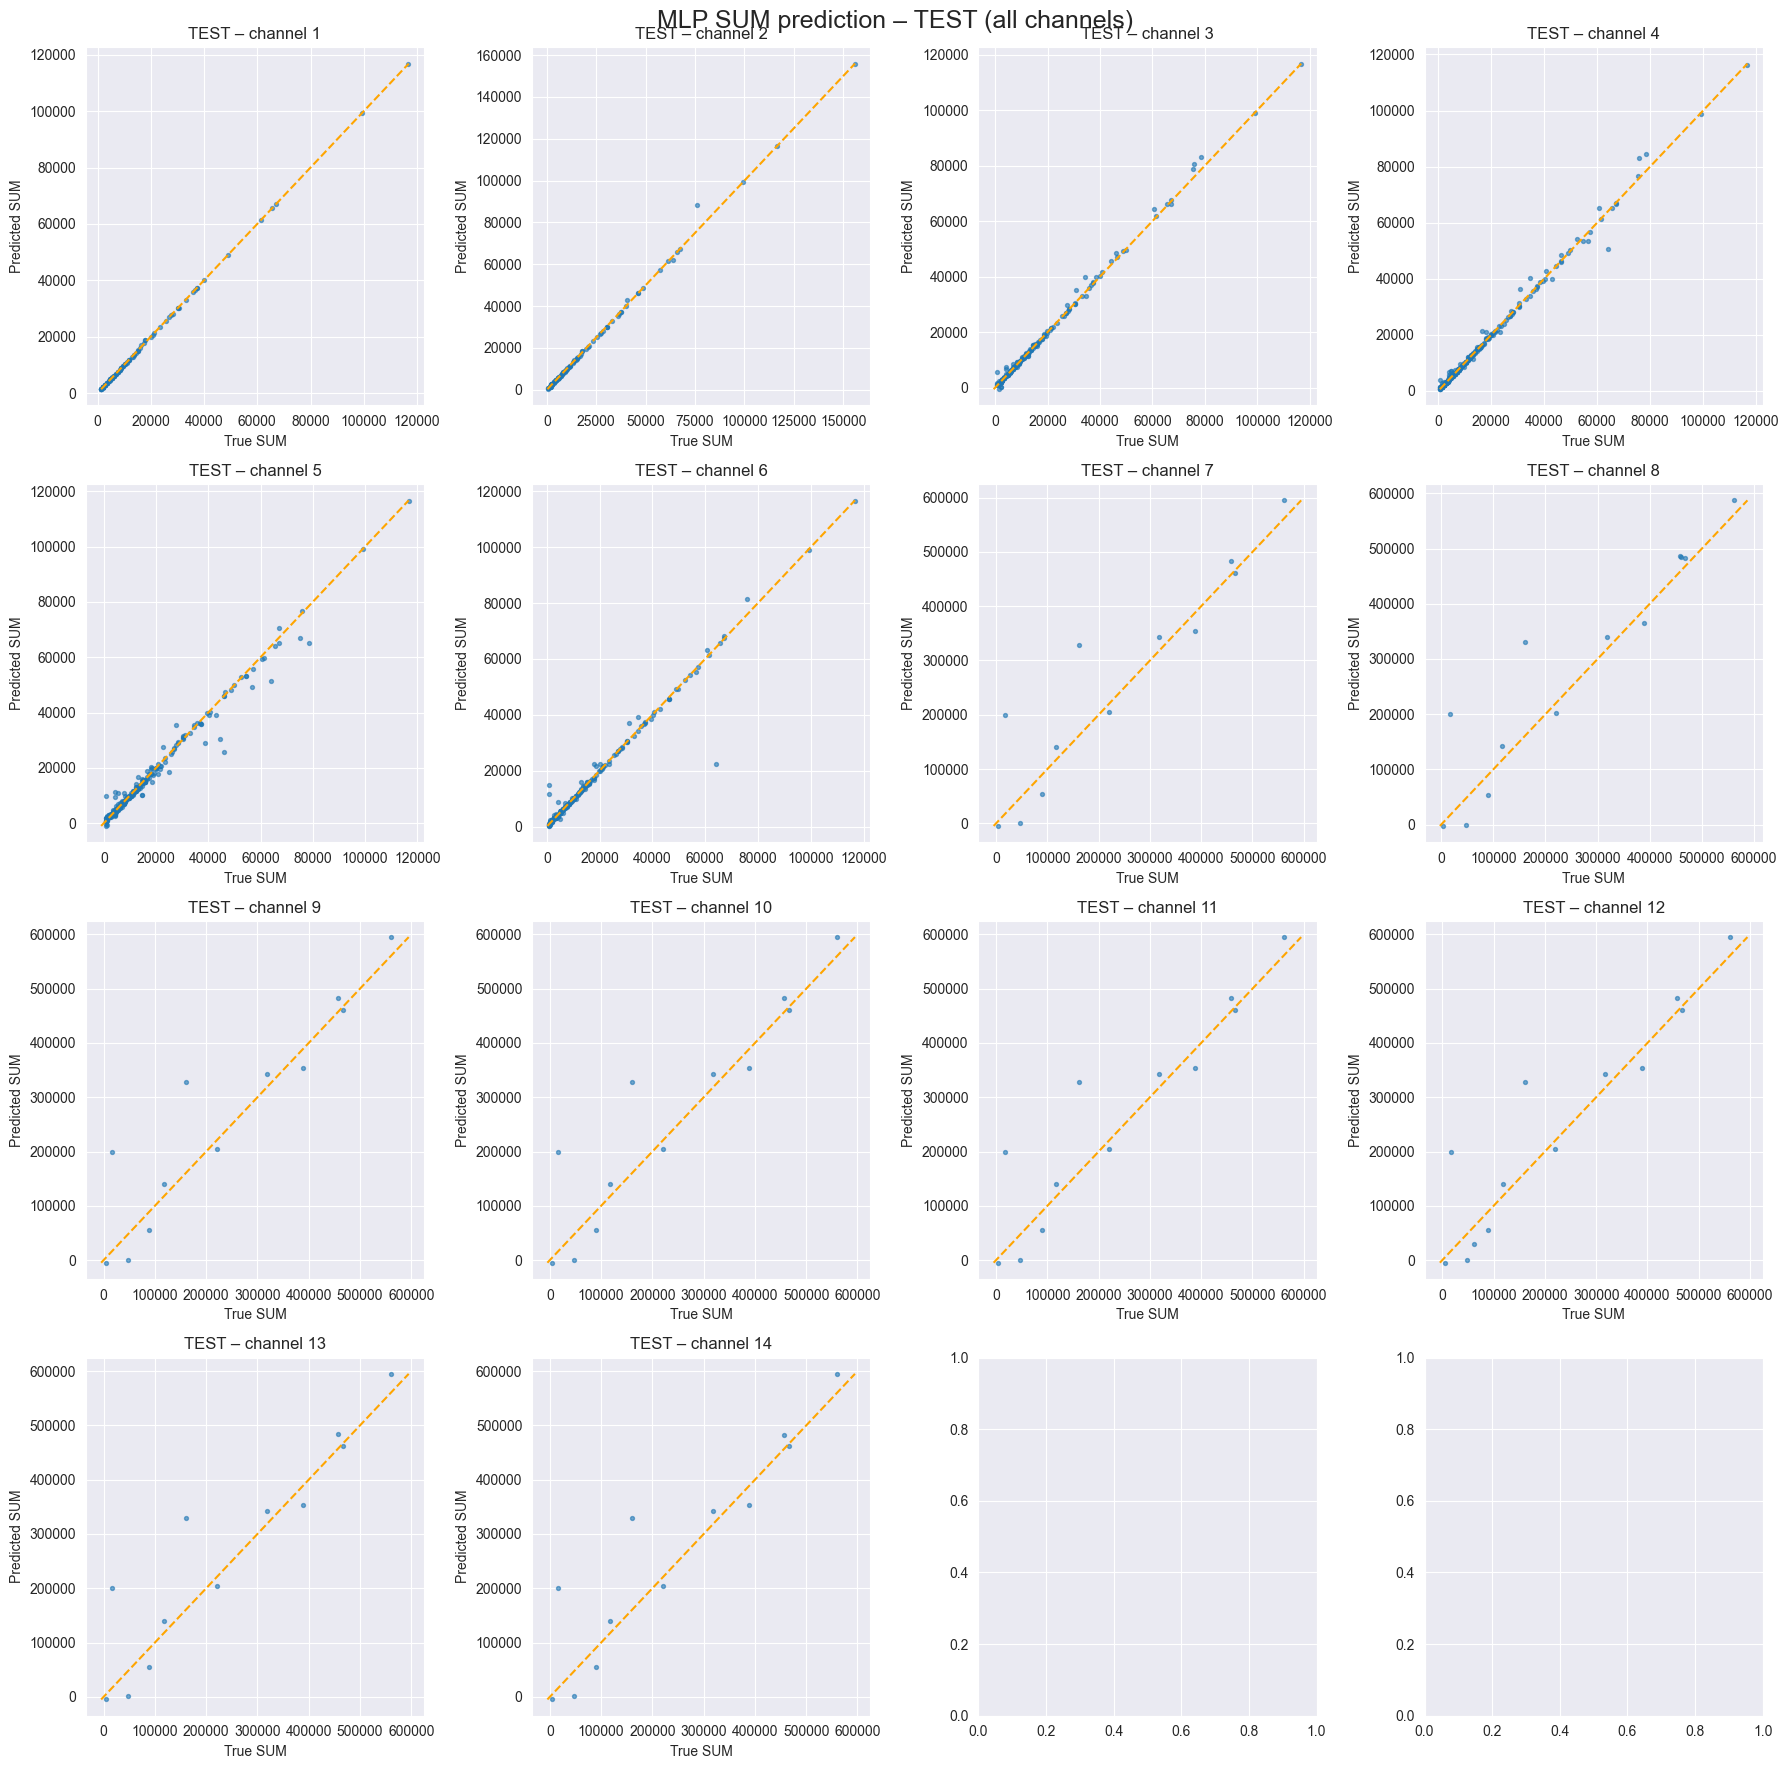

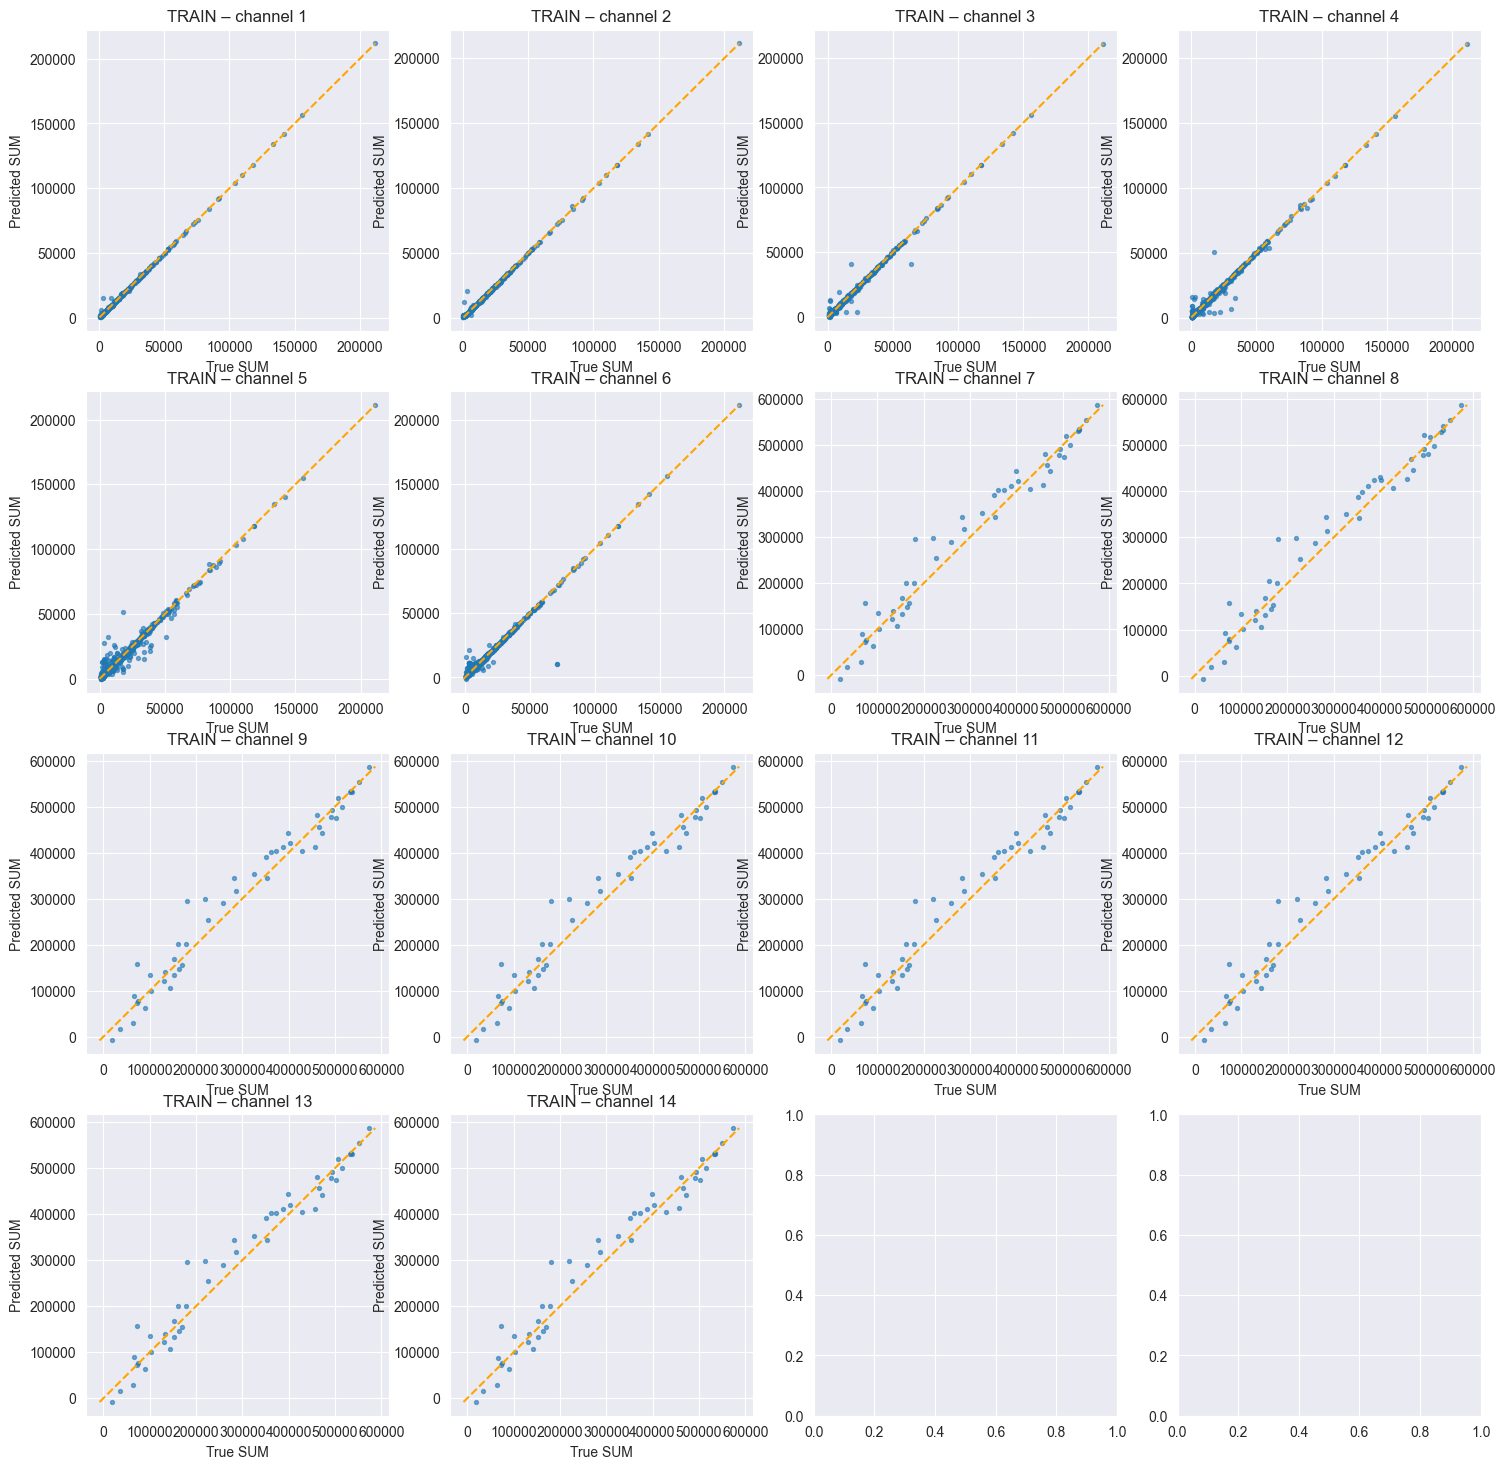

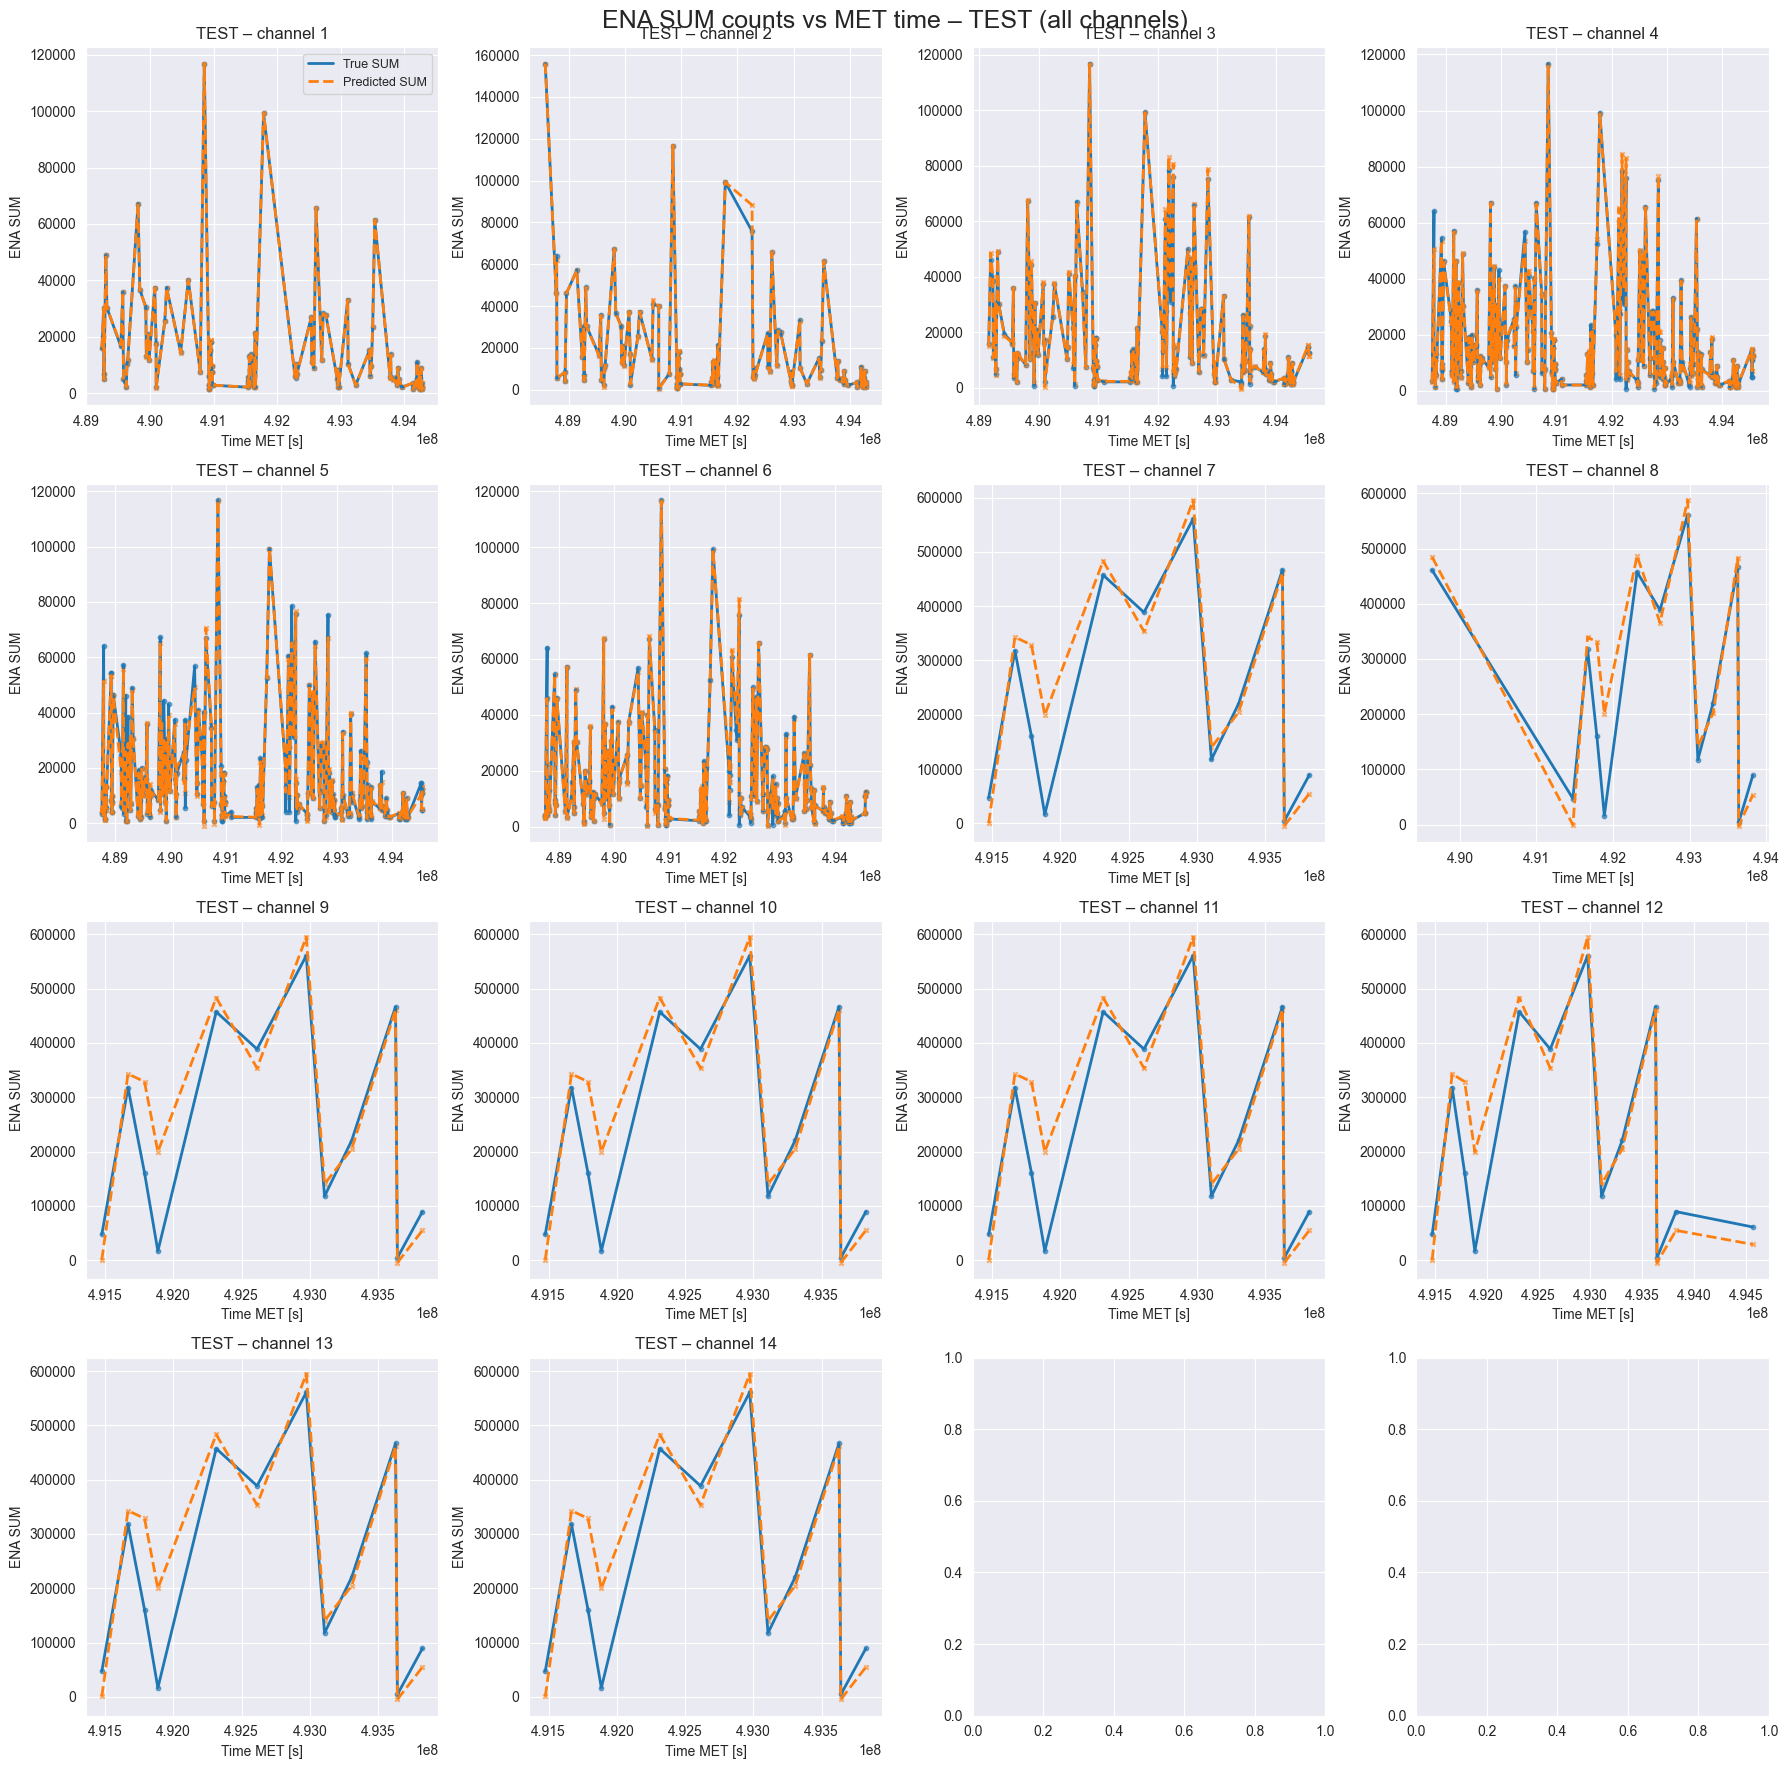

In [49]:
from scipy.interpolate import interp1d

DATA_DIR = "channel_analyzer_out_aggregated/BeforePerigeeChange"
SUM_IDX = 1
START_TIME_IDX = 3
END_TIME_IDX = 4
CHANNELS = range(1, 15)

channel_data = {}
for ch in CHANNELS:
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    channel_data[ch] = np.loadtxt(path, skiprows=1)

channel_interp = {}
for ch in CHANNELS:
    t_mid = 0.5 * (
        channel_data[ch][:, START_TIME_IDX] +
        channel_data[ch][:, END_TIME_IDX]
    )
    sums = channel_data[ch][:, SUM_IDX]

    order = np.argsort(t_mid)
    channel_interp[ch] = interp1d(t_mid[order], sums[order], kind="linear", bounds_error=False, fill_value=np.nan)
results = {}
predictions = {}

for TARGET_CHANNEL in CHANNELS:
    X, y, t_vals = [], [], []

    t_mid_target = 0.5 * (channel_data[TARGET_CHANNEL][:, START_TIME_IDX] + channel_data[TARGET_CHANNEL][:, END_TIME_IDX])
    for t in t_mid_target:
        y_val = channel_interp[TARGET_CHANNEL](t)
        if np.isnan(y_val):
            continue
        x_row = []
        valid = True
        for ch in CHANNELS:
            if ch == TARGET_CHANNEL:
                continue

            v = channel_interp[ch](t)
            if np.isnan(v):
                valid = False
                break
            x_row.append(v)
        if not valid:
            continue
        X.append(x_row)
        y.append(y_val)
        t_vals.append(t)
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1, 1)
    t_vals = np.asarray(t_vals)

    if len(X) < 30:
        print(f"Channel {TARGET_CHANNEL}: too few samples ({len(X)}), skipping")
        continue

    X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(X, y, t_vals, test_size=0.2,shuffle=False)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test  = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train)
    y_test  = scaler_y.transform(y_test)
    mlp = MLPRegressor(
        hidden_layer_sizes=(8,),
        activation="relu",
        solver="adam",
        learning_rate_init=1e-4,
        max_iter=6000,
        tol=1e-7,
        random_state=42
    )
    mlp.fit(X_train, y_train.ravel())
    y_train_pred = scaler_y.inverse_transform(mlp.predict(X_train).reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(mlp.predict(X_test).reshape(-1, 1))
    y_train_true = scaler_y.inverse_transform(y_train)
    y_test_true  = scaler_y.inverse_transform(y_test)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    rmse_std  = rmse_test / np.std(y_test_true)

    predictions[TARGET_CHANNEL] = {"train": (t_train, y_train_true, y_train_pred), "test":  (t_test,  y_test_true,  y_test_pred)}
    results[TARGET_CHANNEL] = rmse_std
    print(f"Channel {TARGET_CHANNEL:2d} | RMSE/STD (TEST) = {rmse_std:.3f}")

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue

    _, y_true, y_pred = predictions[ch]["test"]
    ax = axes[i]
    ax.scatter(y_true, y_pred, s=8, alpha=0.6)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TEST – channel {ch}")
    ax.set_xlabel("True SUM")
    ax.set_ylabel("Predicted SUM")
    ax.grid(True)

plt.suptitle("MLP SUM prediction – TEST (all channels)",fontsize=18)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue
    _, y_true, y_pred = predictions[ch]["train"]
    ax = axes[i]
    ax.scatter(y_true, y_pred, s=8, alpha=0.6)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TRAIN – channel {ch}")
    ax.set_xlabel("True SUM")
    ax.set_ylabel("Predicted SUM")
    ax.grid(True)

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    if ch not in predictions:
        axes[i].set_visible(False)
        continue
    t, y_true, y_pred = predictions[ch]["test"]
    ax = axes[i]
    order = np.argsort(t)
    ax.plot(t[order], y_true[order],linewidth=2,label="True SUM")
    ax.scatter(t[order], y_true[order], s=10, alpha=0.6)
    ax.plot(t[order],y_pred[order], linestyle="--", linewidth=2, label="Predicted SUM")
    ax.scatter(t[order], y_pred[order], s=10, alpha=0.6, marker="x")
    ax.set_title(f"TEST – channel {ch}")
    ax.set_xlabel("Time MET [s]")
    ax.set_ylabel("ENA SUM")
    ax.grid(True)
    if i == 0:
        ax.legend(fontsize=9)

plt.suptitle("ENA SUM counts vs MET time – TEST (all channels)",fontsize=18)
plt.tight_layout()
plt.show()

# Do wizualizacji architektury zastosowanych modeli

In [29]:
from graphviz import Digraph

real_layers = [208, 64, 32, 16]
stride = [16, 16, 16, 16]

layer_names = [
    "Input layer\n(208 features)",
    "Hidden layer 1\n(64 neurons)\nReLU",
    "Hidden layer 2\n(32 neurons)\nReLU",
    "Output layer\n(16 features)\nLinear"
]

dot = Digraph(
    format="pdf",
    graph_attr={
        "rankdir": "LR",
        "splines": "true",
        "nodesep": "0.5",
        "ranksep": "4.5",
        "size": "16,9!",
        "margin": "0.2"
    }
)

layers = []

for i, (real, step, name) in enumerate(zip(real_layers, stride, layer_names)):
    visible = list(range(0, real, step))
    layers.append(visible)

    with dot.subgraph(name=f"cluster_{i}") as c:
        c.attr(
            label=name,
            fontsize="24",
            fontname="Helvetica"
        )

        for n in visible:
            c.node(
                f"L{i}_N{n}",
                shape="circle",
                width="0.8",
                fixedsize="true",
                style="filled",
                fillcolor="white"
            )

for i in range(len(layers) - 1):
    for a in layers[i]:
        for b in layers[i + 1]:
            dot.edge(
                f"L{i}_N{a}",
                f"L{i+1}_N{b}",
                penwidth="0.4",
                color="black"
            )

dot.render("mlp_structure_final", view=True)


'mlp_structure_final.pdf'

In [2]:
import torch
from torchviz import make_dot
from IBEX_Module.IBEX_NN import RateAutoencoder

model = RateAutoencoder(input_dim=14, latent_dim=4)
x = torch.randn(1, 14)
x_hat, z = model(x)

dot = make_dot(
    x_hat,
    params=dict(model.named_parameters())
)

dot.render("rate_autoencoder_graph", format="pdf")

'rate_autoencoder_graph.pdf'

# Playground :) - część rzeczy nie ma sensu lub po prostu nie działa

In [55]:
REAL_DIR = "output/AfterPerigeeChange"
def load_channel_scalar(path):
    return torch.load(path)[:, 1].numpy()

channels = ([("hi", i) for i in range(1, 7)] + [("lo", i) for i in range(1, 9)])
series = []
labels = []
for ch_type, ch_num in channels:
    subdir = "Hi_data" if ch_type == "hi" else "Lo_data"
    path = os.path.join(
        REAL_DIR,
        subdir,
        f"{ch_type}_hex_channel_{ch_num}.pt"
    )
    series.append(load_channel_scalar(path))
    labels.append(f"{ch_type.upper()}-{ch_num}")

TARGET_CHANNEL = "LO-8"
min_len = min(len(s) for s in series)
series = [s[:min_len] for s in series]
data = np.column_stack(series)
print("Dane wczytane:", data.shape)
k = labels.index(TARGET_CHANNEL)
X = np.delete(data, k, axis=1)
y = data[:, k]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
regr = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation="relu",
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
rmse_std = rmse / np.std(y_test)
print(f"Channel: {TARGET_CHANNEL} -  RMSE ={rmse:.3f}, MAE={mae:.3f}, R²= {r2:.4f}, RMSE/STD={rmse_std:.3f}\n")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.figure(figsize=(16, 9))
plt.scatter(y_test, y_pred, s=5, alpha=0.4)
min_val = y_test.min()
max_val = y_test.max()
plt.plot([min_val, max_val],[min_val, max_val],linestyle="--",color="red",linewidth=2,label="Idealna predykcja (y = x)")
pad = 0.01
dx = max_val - min_val
plt.xlim(min_val - pad*dx, max_val + pad*dx)
plt.ylim(min_val - pad*dx, max_val + pad*dx)
plt.xlabel(f"Wartości referencyjne kanału {TARGET_CHANNEL}")
plt.ylabel(f"Wartości przewidziane kanału {TARGET_CHANNEL}")
plt.title(f"Porównanie danych referencyjnych i przewidzianych dla kanału {TARGET_CHANNEL} (MLPRegressor)")
plt.legend(loc="upper left")
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Using common length: 186
X shape: (186, 52)
y shape: (186, 4)
==== TRAINING ====
RMSE (global):        0.0243
MAE  (global):        0.0169
STD  (global):        1.0000
RMSE / STD (global):  0.0243
RMSE (physical):      0.0033
MAE  (physical):      0.0017
STD  (physical):      0.2380
RMSE / STD (physical):0.0138

==== TEST ====
TARGET CHANNEL = 1
RMSE (global):        1.6128
MAE  (global):        1.1529
STD  (global):        1.0309
RMSE / STD (global):  1.5644
RMSE (physical):      0.3336
MAE  (physical):      0.1470
STD  (physical):      0.3073
RMSE / STD (physical):1.0856


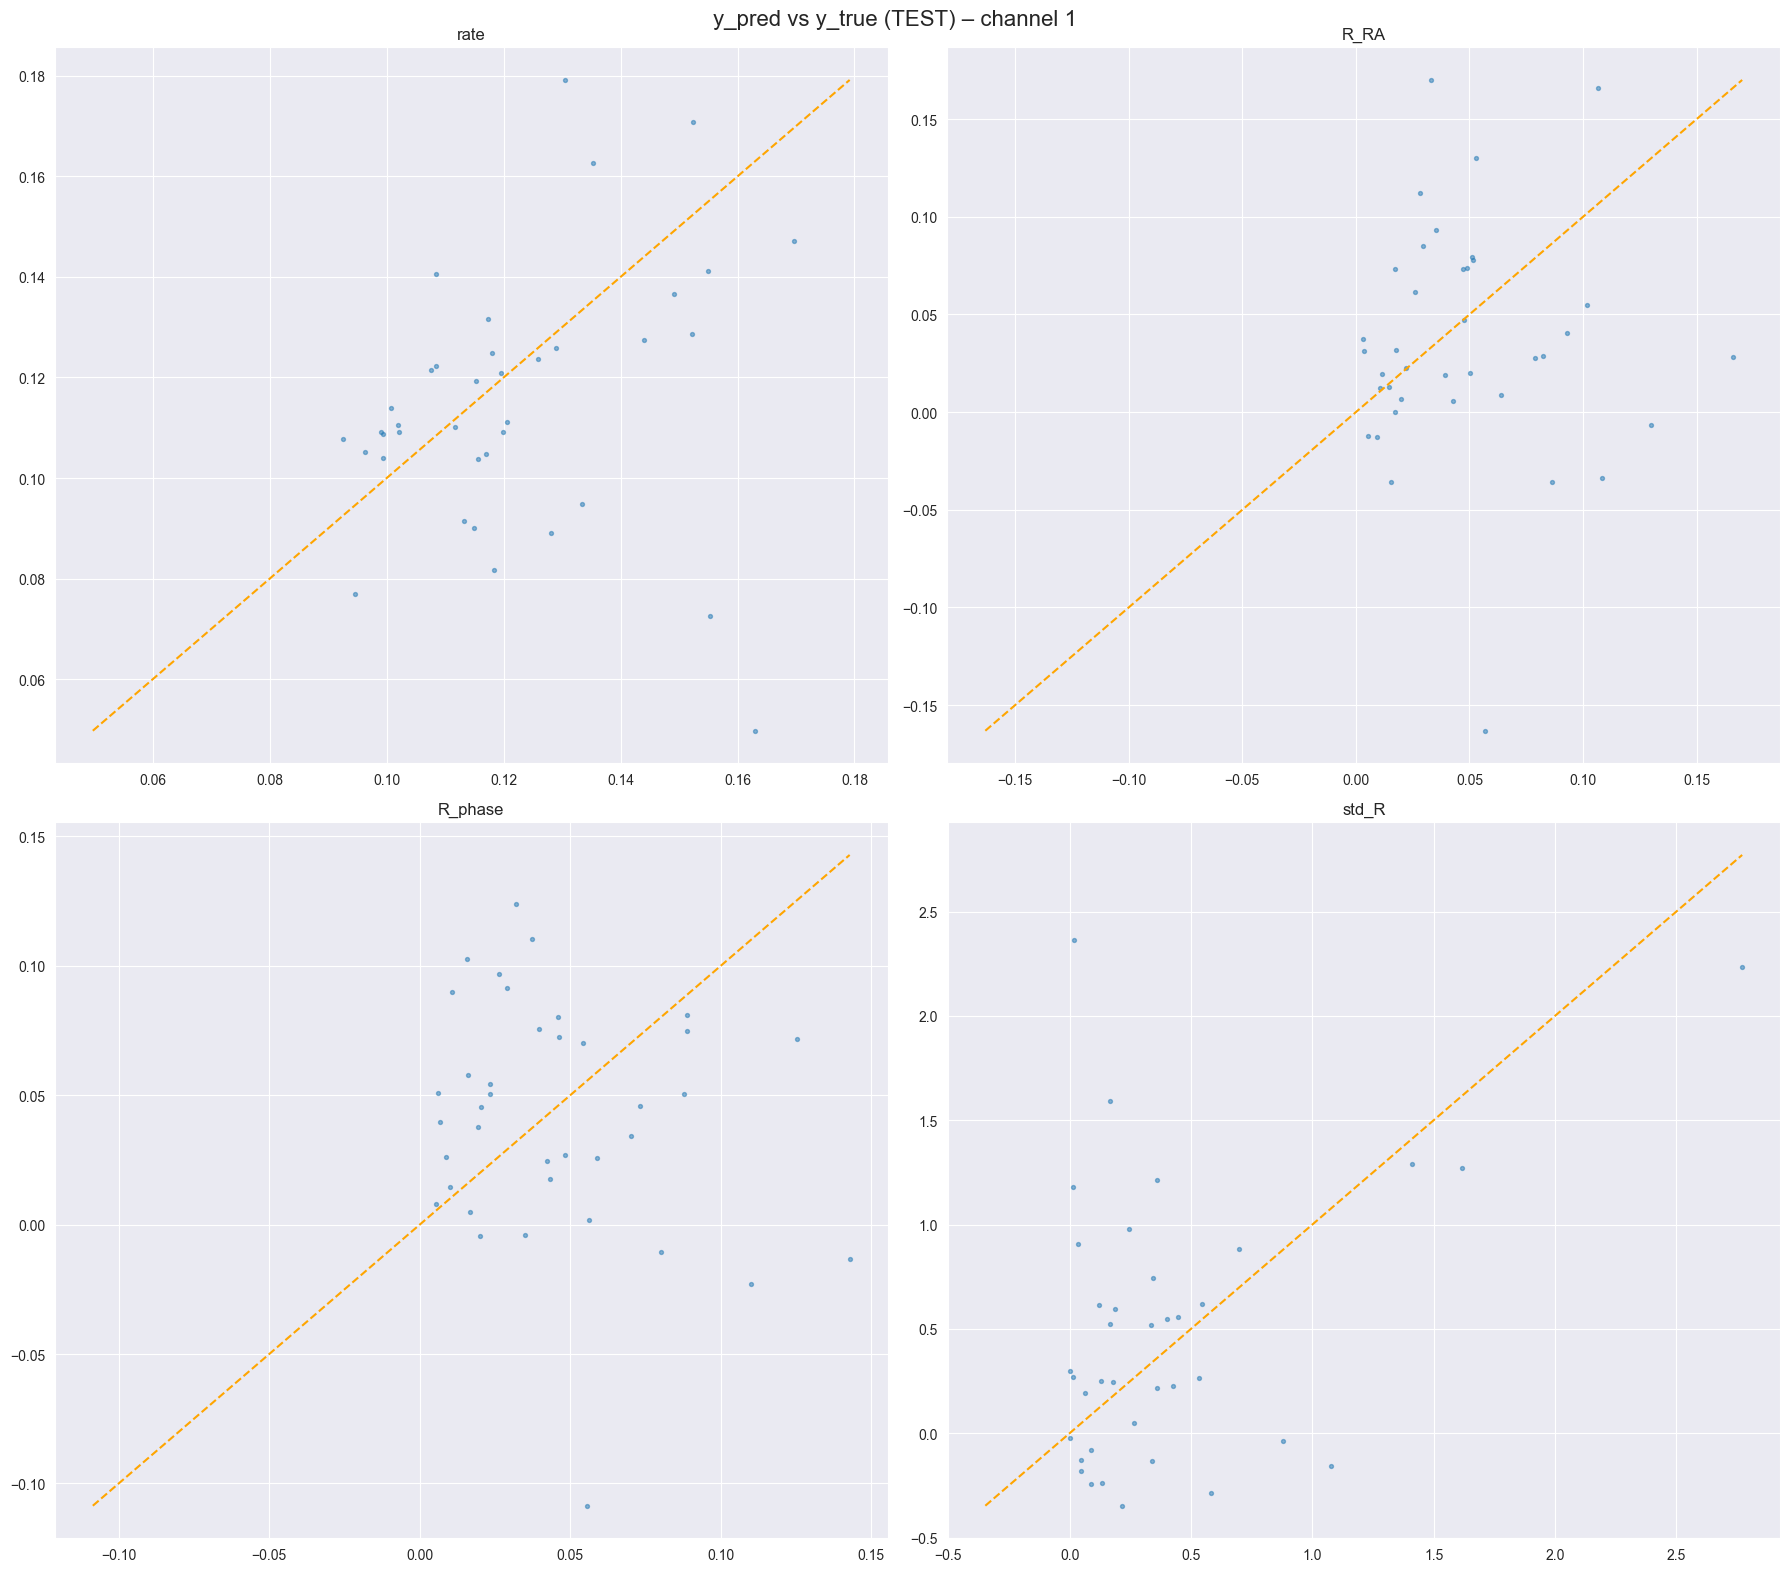

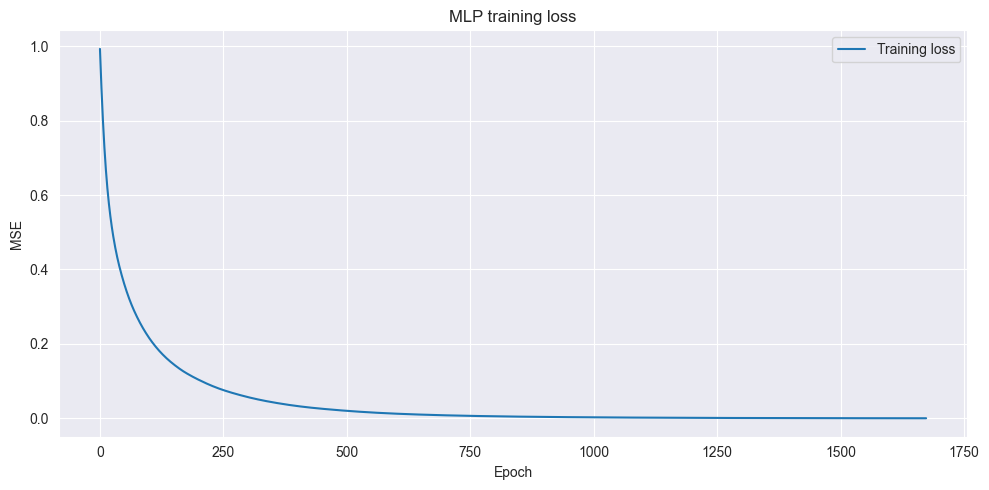

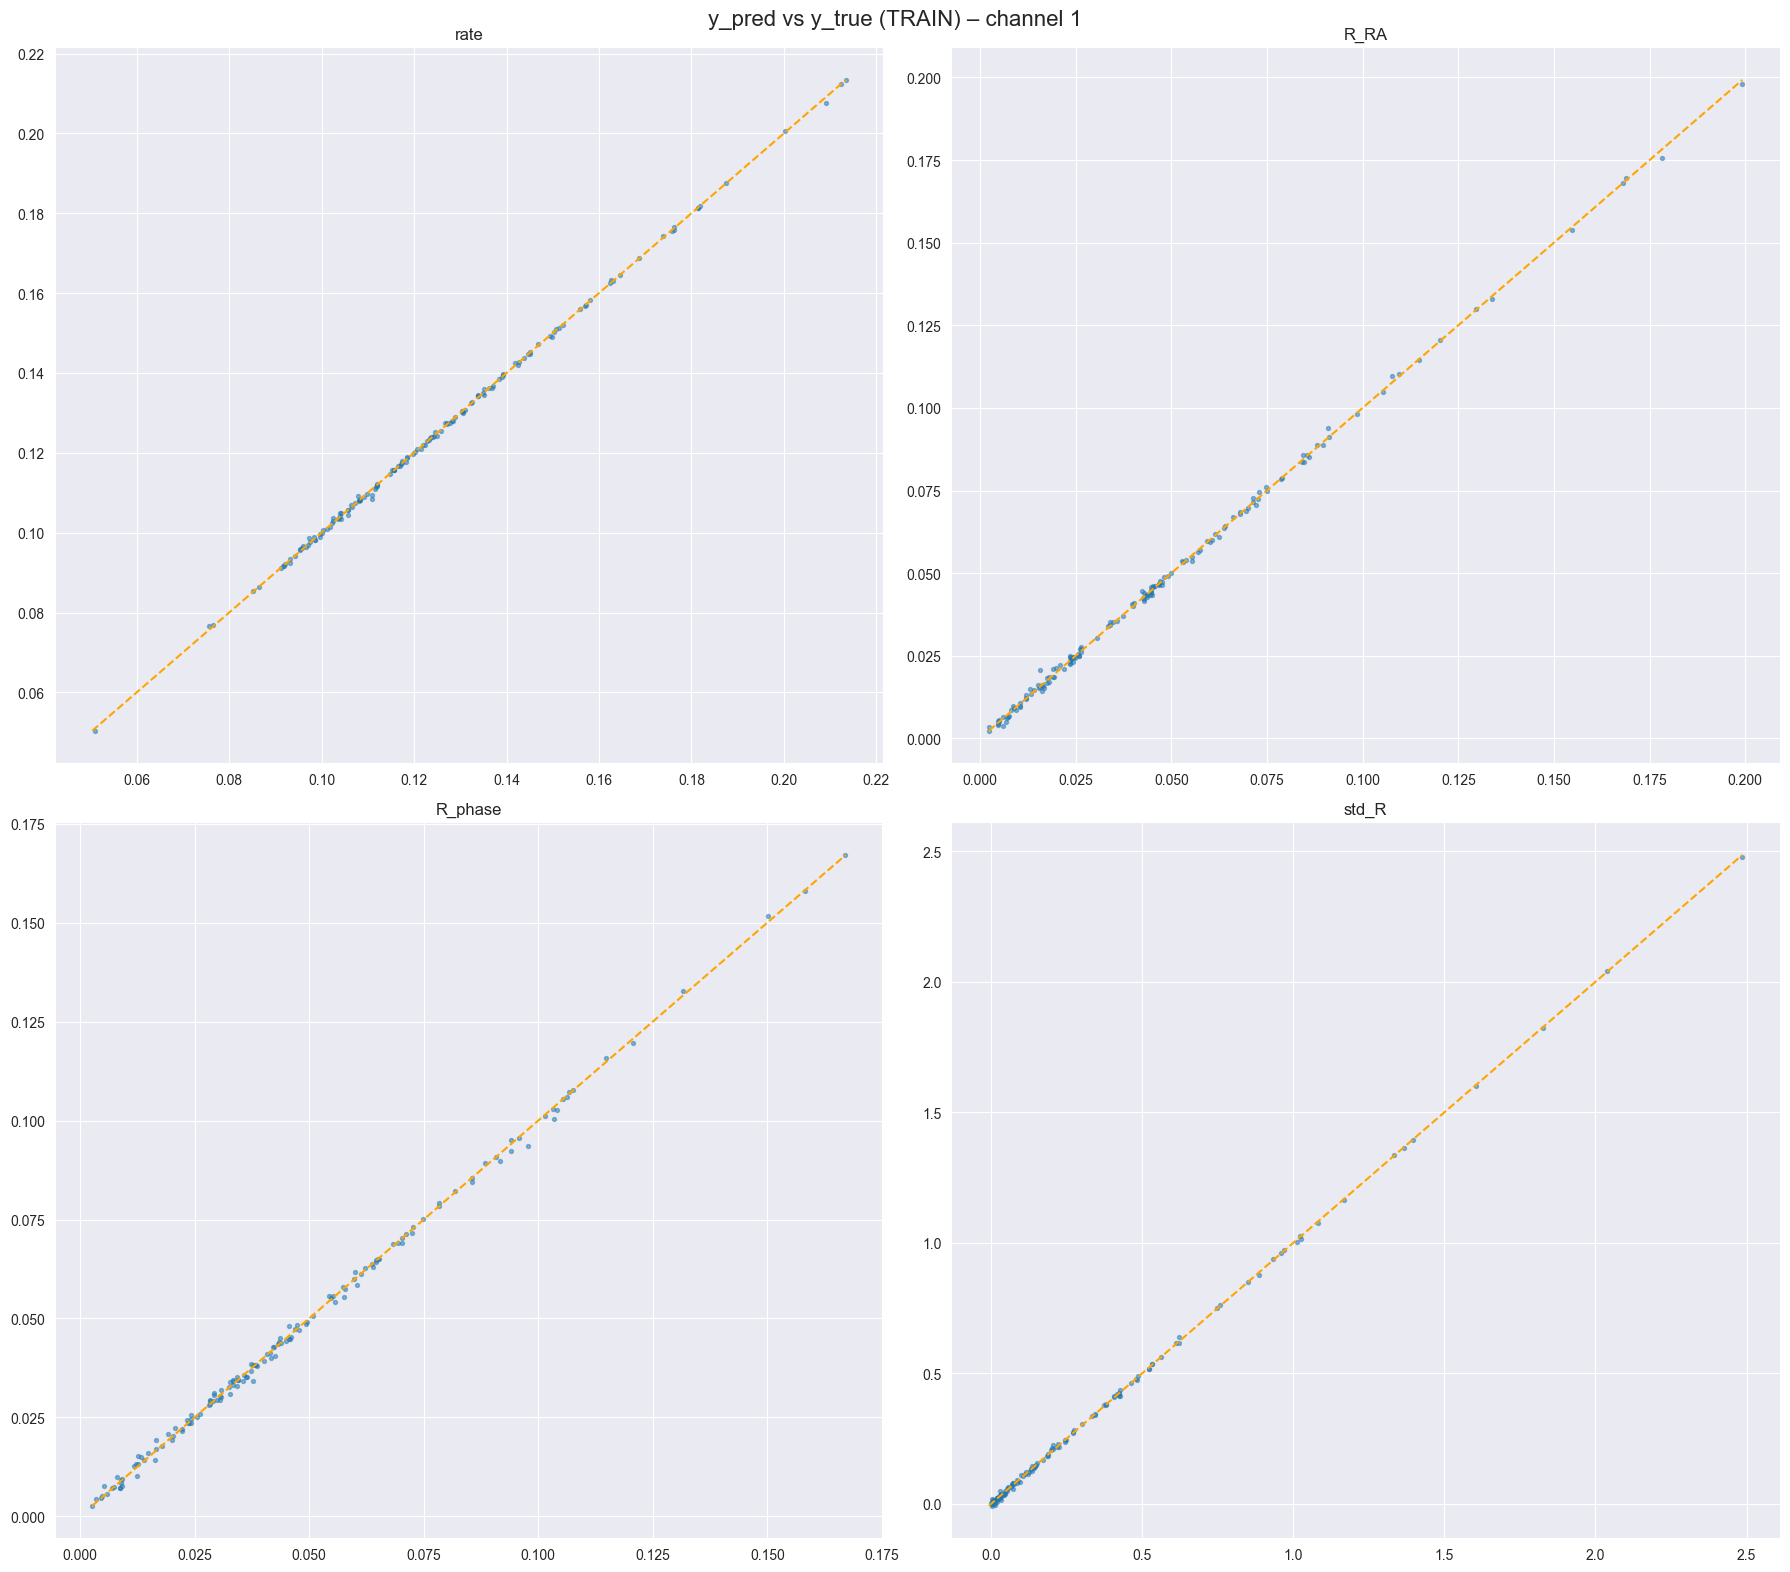

In [101]:
# CONFIG
DATA_DIR = "channel_analyzer_out_aggregated/AfterPerigeeChange"
TARGET_CHANNEL = 1

FEATURE_IDXS = [
    # 0,      # sum
    4,      # rate
    # 5,      # cos(RA)
    # 6,      # sin(RA)
    7,      # R_RA
    # 8,    # cos(phase)
    # 9,    # sin(phase)
    10,   # R(phase)
    # 11,   # mean(X)
    # 12,   # mean(Y)
    # 13,   # mean(Z)
    # 14,   # std(X)
    # 15,   # std(Y)
    # 16,   # std(Z)
    # 17,   # mean(R)
    18    # std(R)
]
FEATURE_NAMES = [
    # "sum",
    "rate",
    # "cos_RA",
    # "sin_RA",
    "R_RA",
    # "cos_phase",
    # "sin_phase",
    "R_phase",
    # "mean_X",
    # "mean_Y",
    # "mean_Z",
    # "std_X",
    # "std_Y",
    # "std_Z",
    # "mean_R",
    "std_R"
]
# LOAD DATA
channel_data = {}
lengths = []

for ch in range(1, 15):
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    data = np.loadtxt(path, skiprows=1)
    channel_data[ch] = data
    lengths.append(len(data))

min_len = min(lengths)
print("Using common length:", min_len)

# BUILD X, y
X_list = []
y_list = []

for i in range(min_len):
    x_row = []

    for ch in range(1, 15):
        features = channel_data[ch][i, FEATURE_IDXS]

        if ch == TARGET_CHANNEL:
            y_row = features
        else:
            x_row.extend(features)

    X_list.append(x_row)
    y_list.append(y_row)

X = np.array(X_list)
y = np.array(y_list)

print("X shape:", X.shape)
print("y shape:", y.shape)

# SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SCALE
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)
# MODEL
mlp = MLPRegressor(
    hidden_layer_sizes=(32, ),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    max_iter=3000,
    random_state=42,
    tol=1e-6
)

mlp.fit(X_train, y_train)
# PREDICTION
y_train_pred = mlp.predict(X_train)
y_test_pred  = mlp.predict(X_test)

# METRICS (global)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae  = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
# INVERSE SCALE (y)
y_train_true_phys = scaler_y.inverse_transform(y_train)
y_train_pred_phys = scaler_y.inverse_transform(y_train_pred)
y_test_true_phys  = scaler_y.inverse_transform(y_test)
y_test_pred_phys  = scaler_y.inverse_transform(y_test_pred)
rmse_phys = np.sqrt(mean_squared_error(y_test_true_phys, y_test_pred_phys))
mae_phys  = mean_absolute_error(y_test_true_phys, y_test_pred_phys)
rmse_phys_train = np.sqrt(mean_squared_error(y_train_true_phys, y_train_pred_phys))
mae_phys_train  = mean_absolute_error(y_train_true_phys, y_train_pred_phys)
std_train = np.std(y_train)
std_test  = np.std(y_test)
rmse_std_train = rmse_train / std_train
rmse_std_test  = rmse / std_test
std_train_phys = np.std(y_train_true_phys)
std_test_phys  = np.std(y_test_true_phys)
rmse_std_train_phys = rmse_phys_train / std_train_phys
rmse_std_test_phys  = rmse_phys / std_test_phys

print("==== TRAINING ====")
print(f"RMSE (global):        {rmse_train:.4f}")
print(f"MAE  (global):        {mae_train:.4f}")
print(f"STD  (global):        {std_train:.4f}")
print(f"RMSE / STD (global):  {rmse_std_train:.4f}")
print(f"RMSE (physical):      {rmse_phys_train:.4f}")
print(f"MAE  (physical):      {mae_phys_train:.4f}")
print(f"STD  (physical):      {std_train_phys:.4f}")
print(f"RMSE / STD (physical):{rmse_std_train_phys:.4f}")
print("\n==== TEST ====")
print(f"TARGET CHANNEL = {TARGET_CHANNEL}")
print(f"RMSE (global):        {rmse:.4f}")
print(f"MAE  (global):        {mae:.4f}")
print(f"STD  (global):        {std_test:.4f}")
print(f"RMSE / STD (global):  {rmse_std_test:.4f}")
print(f"RMSE (physical):      {rmse_phys:.4f}")
print(f"MAE  (physical):      {mae_phys:.4f}")
print(f"STD  (physical):      {std_test_phys:.4f}")
print(f"RMSE / STD (physical):{rmse_std_test_phys:.4f}")
# PLOTS
#y_pred vs y_true (TEST)
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(
        y_test_true_phys[:, i],
        y_test_pred_phys[:, i],
        s=8,
        alpha=0.5
    )
    lims = [
        min(y_test_true_phys[:, i].min(), y_test_pred_phys[:, i].min()),
        max(y_test_true_phys[:, i].max(), y_test_pred_phys[:, i].max())
    ]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)

plt.suptitle(f"y_pred vs y_true (TEST) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()

# Training loss plot
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label="Training loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MLP training loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(FEATURE_NAMES)]):
    ax.scatter(
        y_train_true_phys[:, i],
        y_train_pred_phys[:, i],
        s=8,
        alpha=0.5
    )
    lims = [min(y_train_true_phys[:, i].min(), y_train_pred_phys[:, i].min()), max(y_train_true_phys[:, i].max(), y_train_pred_phys[:, i].max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(FEATURE_NAMES[i])
    ax.grid(True)
plt.suptitle(f"y_pred vs y_true (TRAIN) – channel {TARGET_CHANNEL}", fontsize=16)
plt.tight_layout()
plt.show()


In [1]:
DATA_DIR = "channel_analyzer_out_aggregated/AfterPerigeeChange"
RATE_IDX = 4
CHANNELS = range(1, 15)
channel_data = {}
lengths = []

for ch in CHANNELS:
    path = os.path.join(DATA_DIR, f"channel_{ch}_good_data_aggregated.txt")
    data = np.loadtxt(path, skiprows=1)
    channel_data[ch] = data
    lengths.append(len(data))
min_len = min(lengths)
print("Using common length:", min_len)
results = {}
predictions = {}
for TARGET_CHANNEL in CHANNELS:
    X_list, y_list = [], []

    for i in range(min_len):
        x_row = []
        for ch in CHANNELS:
            rate = channel_data[ch][i, RATE_IDX]
            if ch== TARGET_CHANNEL:
                y_val = rate
            else:
                x_row.append(rate)
        X_list.append(x_row)
        y_list.append(y_val)

    X = np.array(X_list)
    y = np.array(y_list).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test  = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train)
    y_test  = scaler_y.transform(y_test)

    mlp = MLPRegressor(
        hidden_layer_sizes=(8,),
        activation="relu",
        solver="adam",
        learning_rate_init=1e-4,
        max_iter=8000,
        tol=1e-7,
        random_state=42
    )

    mlp.fit(X_train, y_train.ravel())
    y_train_pred= mlp.predict(X_train).reshape(-1, 1)
    y_test_pred  =mlp.predict(X_test).reshape(-1, 1)
    y_train_true= scaler_y.inverse_transform(y_train)
    y_train_pred = scaler_y.inverse_transform(y_train_pred)
    y_test_true= scaler_y.inverse_transform(y_test)
    y_test_pred= scaler_y.inverse_transform(y_test_pred)
    rmse_test= np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    std_test= np.std(y_test_true)
    rmse_std= rmse_test / std_test

    results[TARGET_CHANNEL] = rmse_std
    predictions[TARGET_CHANNEL] = {"train": (y_train_true, y_train_pred), "test":  (y_test_true,  y_test_pred)}
    print(f"Channel {TARGET_CHANNEL:2d} | "f"RMSE/STD (TEST) = {rmse_std:.3f}")

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    y_true, y_pred = predictions[ch]["test"]
    ax = axes[i]

    ax.scatter(y_true, y_pred, s=8, alpha=0.6)

    lims = [
        min(y_true.min(), y_pred.min()),
        max(y_true.max(), y_pred.max())
    ]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TEST – channel {ch}")
    ax.grid(True)

plt.suptitle("MLP rate-only prediction – TEST (all channels)", fontsize=18)
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, ch in enumerate(CHANNELS):
    y_true, y_pred = predictions[ch]["train"]
    ax = axes[i]
    ax.scatter(y_true, y_pred, s=8, alpha=0.6)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, "--", color="orange")
    ax.set_title(f"TRAIN – channel {ch}")
    ax.grid(True)

plt.suptitle("MLP rate-only prediction – TRAIN (all channels)", fontsize=18)
plt.tight_layout()
plt.show()


NameError: name 'os' is not defined

In [3]:
from sklearn.feature_selection import mutual_info_regression

REAL_DIR = "output/BeforePerigeeChange"
channels = ([("hi", i) for i in range(1, 7)] + [("lo", i) for i in range(1, 9)])
def load_channel_scalar(path):
    return torch.load(path)[:, 1].numpy()

series = []
labels = []

for ch_type, ch_num in channels:
    subdir = "Hi_data" if ch_type == "hi" else "Lo_data"
    path = os.path.join(REAL_DIR,subdir,f"{ch_type}_hex_channel_{ch_num}.pt")
    series.append(load_channel_scalar(path))
    labels.append(f"{ch_type.upper()}-{ch_num}")
min_len = min(len(s) for s in series)
series = [s[:min_len] for s in series]
print("Loading tensors done")
data = np.column_stack(series)
results = {}

for k, label in enumerate(labels):
    X = np.delete(data, k, axis=1)
    y = data[:, k]
    mi = mutual_info_regression(X, y,random_state=42,n_neighbors=5)
    total_mi = mi.sum()
    results[label] = {"total_mi": total_mi,"mean_mi": mi.mean(),"max_mi": mi.max()}
    print(f"\n=== {label} ===")
    print(f"Total MI : {total_mi:.6f}")
    print(f"Mean  MI : {mi.mean():.6f}")
    print(f"Max   MI : {mi.max():.6f}")

print("\n=== SUMMARY (Mutual Information) ===")
for ch, vals in results.items():
    print(
        f"{ch:6s} | "
        f"Total MI = {vals['total_mi']:.6f} | "
        f"Mean MI = {vals['mean_mi']:.6f} | "
        f"Max MI = {vals['max_mi']:.6f}"
    )

Loading tensors done

=== HI-1 ===
Total MI : 0.519991
Mean  MI : 0.039999
Max   MI : 0.086491

=== HI-2 ===
Total MI : 0.640860
Mean  MI : 0.049297
Max   MI : 0.111885

=== HI-3 ===
Total MI : 0.612360
Mean  MI : 0.047105
Max   MI : 0.103927

=== HI-4 ===
Total MI : 0.558715
Mean  MI : 0.042978
Max   MI : 0.095202

=== HI-5 ===
Total MI : 0.492809
Mean  MI : 0.037908
Max   MI : 0.082639

=== HI-6 ===
Total MI : 0.416666
Mean  MI : 0.032051
Max   MI : 0.067315

=== LO-1 ===
Total MI : 3.274541
Mean  MI : 0.251888
Max   MI : 0.791372

=== LO-2 ===
Total MI : 3.492676
Mean  MI : 0.268667
Max   MI : 0.902675

=== LO-3 ===
Total MI : 3.377512
Mean  MI : 0.259809
Max   MI : 0.875405

=== LO-4 ===
Total MI : 1.308556
Mean  MI : 0.100658
Max   MI : 0.256204

=== LO-5 ===
Total MI : 0.819207
Mean  MI : 0.063016
Max   MI : 0.166160

=== LO-6 ===
Total MI : 1.076989
Mean  MI : 0.082845
Max   MI : 0.210116

=== LO-7 ===
Total MI : 1.260151
Mean  MI : 0.096935
Max   MI : 0.258850

=== LO-8 ===
Tot